In [3]:
# Импортируем необходимые модули
%pylab inline  
import pandas as pd
import pandas_profiling
import ipywidgets as widgets
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="darkgrid")

from plotly.subplots import make_subplots
from collections import Counter

import catboost
import sklearn

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [88]:
# Чтение данных из csv
df = pd.read_csv('anxietyNew.csv')
df.head(10)

,Gender,Age,Sample,A1,A2,A3,A4,A5,A6,A7,...,B16,B17,N,diagnosis_before,diagnosis_event,N_GAD,diagnosis_GAD,form,post_GAD,ASQ_worked
0,Female,21 - 30,Clinical,6,7,4,6,2,3,4,...,4,3,161,GAD,1,58,1,mild,NaN,1
1,Male,21 - 30,NCN,2,3,5,4,1,3,2,...,4,3,81,none,0,32,0,episodic,NaN,1
2,Female,21 - 30,College,5,4,7,4,6,3,5,...,1,10,130,none,1,36,0,mild,0.0,1
3,Female,21 - 30,Clinical,9,6,8,9,2,6,9,...,7,7,227,GAD,1,78,1,moderate,NaN,1
4,Male,21 - 30,Clinical,10,8,9,10,4,9,9,...,8,9,210,GAD,1,80,1,moderate,NaN,1
5,Female,21 - 30,College,6,4,10,8,5,7,2,...,4,4,165,none,1,67,1,mild,1.0,1
6,Female,31 - 40,Clinical,8,4,8,7,2,10,8,...,8,10,199,GAD,1,70,1,moderate,NaN,1
7,Female,21 - 30,Clinical,9,7,9,10,2,6,7,...,9,9,215,GAD,1,76,1,mild,NaN,1
8,Female,21 - 30,Clinical,7,8,6,6,5,5,7,...,7,8,217,GAD,1,79,1,mild,NaN,1
9,Male,21 - 30,College,5,9,4,3,7,6,4,...,2,4,111,none,1,51,1,mild,1.0,1


In [5]:
# Удалим переменные, не относящиеся к опросу
df = df.drop(columns = ['ASQ_worked']) if 'ASQ_worked' in df else df
df = df.drop(columns = ['post_GAD']) if 'post_GAD' in df else df
df = df.drop(columns = ['diagnosis_before']) if 'diagnosis_before' in df else df

df.shape
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           224 non-null    object
 1   Age              224 non-null    object
 2   Sample           224 non-null    object
 3   A1               224 non-null    int64 
 4   A2               224 non-null    int64 
 5   A3               224 non-null    int64 
 6   A4               224 non-null    int64 
 7   A5               224 non-null    int64 
 8   A6               224 non-null    int64 
 9   A7               224 non-null    int64 
 10  A7_symptom       157 non-null    object
 11  A8               224 non-null    int64 
 12  A9               224 non-null    int64 
 13  A10              224 non-null    int64 
 14  A11              224 non-null    int64 
 15  A11_symptom      127 non-null    object
 16  A12              224 non-null    int64 
 17  A12_symptom      107 non-null    ob

In [6]:
# Вынесем в отдельный файл прогноз ГТР
df["diagnosis_GAD"].to_csv('y1.csv')

In [7]:
# Чтение файла по прогнозу ГТР - целевой переменной
f=open('y1.csv','r')
txt=f.read()
f.close()
list1=txt.split('\n')
X=[]
#print(list1[1::])
for i in list1[1::]:
    elem=i.split(',')
    r=[float(item) for item in elem if len(item)>0]
    X.append(r[1::])
print(X)

[[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0]

In [96]:
Y=np.array([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0]])

In [9]:
# Подготовка обучающих данных

df = df.drop(columns = ['diagnosis_event']) if 'diagnosis_event' in df else df
df = df.drop(columns = ['N_GAD']) if 'N_GAD' in df else df
df = df.drop(columns = ['N']) if 'N' in df else df
df.head(10)

,Gender,Age,Sample,A1,A2,A3,A4,A5,A6,A7,...,B10,B11,B12,B13,B14,B15,B16,B17,diagnosis_GAD,form
0,Female,21 - 30,Clinical,6,7,4,6,2,3,4,...,4,3,6,2,5,7,4,3,1,mild
1,Male,21 - 30,NCN,2,3,5,4,1,3,2,...,2,0,2,1,2,3,4,3,0,episodic
2,Female,21 - 30,College,5,4,7,4,6,3,5,...,4,1,2,1,2,1,1,10,0,mild
3,Female,21 - 30,Clinical,9,6,8,9,2,6,9,...,4,3,9,8,8,7,7,7,1,moderate
4,Male,21 - 30,Clinical,10,8,9,10,4,9,9,...,6,4,2,5,7,5,8,9,1,moderate
5,Female,21 - 30,College,6,4,10,8,5,7,2,...,6,1,0,2,4,4,4,4,1,mild
6,Female,31 - 40,Clinical,8,4,8,7,2,10,8,...,7,5,3,6,7,7,8,10,1,moderate
7,Female,21 - 30,Clinical,9,7,9,10,2,6,7,...,4,4,5,7,7,8,9,9,1,mild
8,Female,21 - 30,Clinical,7,8,6,6,5,5,7,...,6,4,7,6,6,6,7,8,1,mild
9,Male,21 - 30,College,5,9,4,3,7,6,4,...,1,0,1,1,2,3,2,4,1,mild


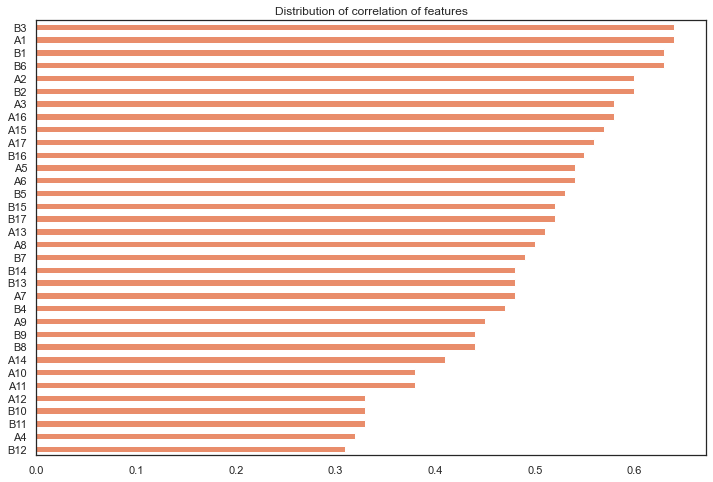

In [89]:
sns.set_style('white')
sns.set_palette('flare')
plt.figure(figsize = (12,8))
plt.title('Distribution of correlation of features')
abs(df.corr(method='spearman').round(2)['diagnosis_GAD']).sort_values()[:-1].plot.barh() 
plt.show()

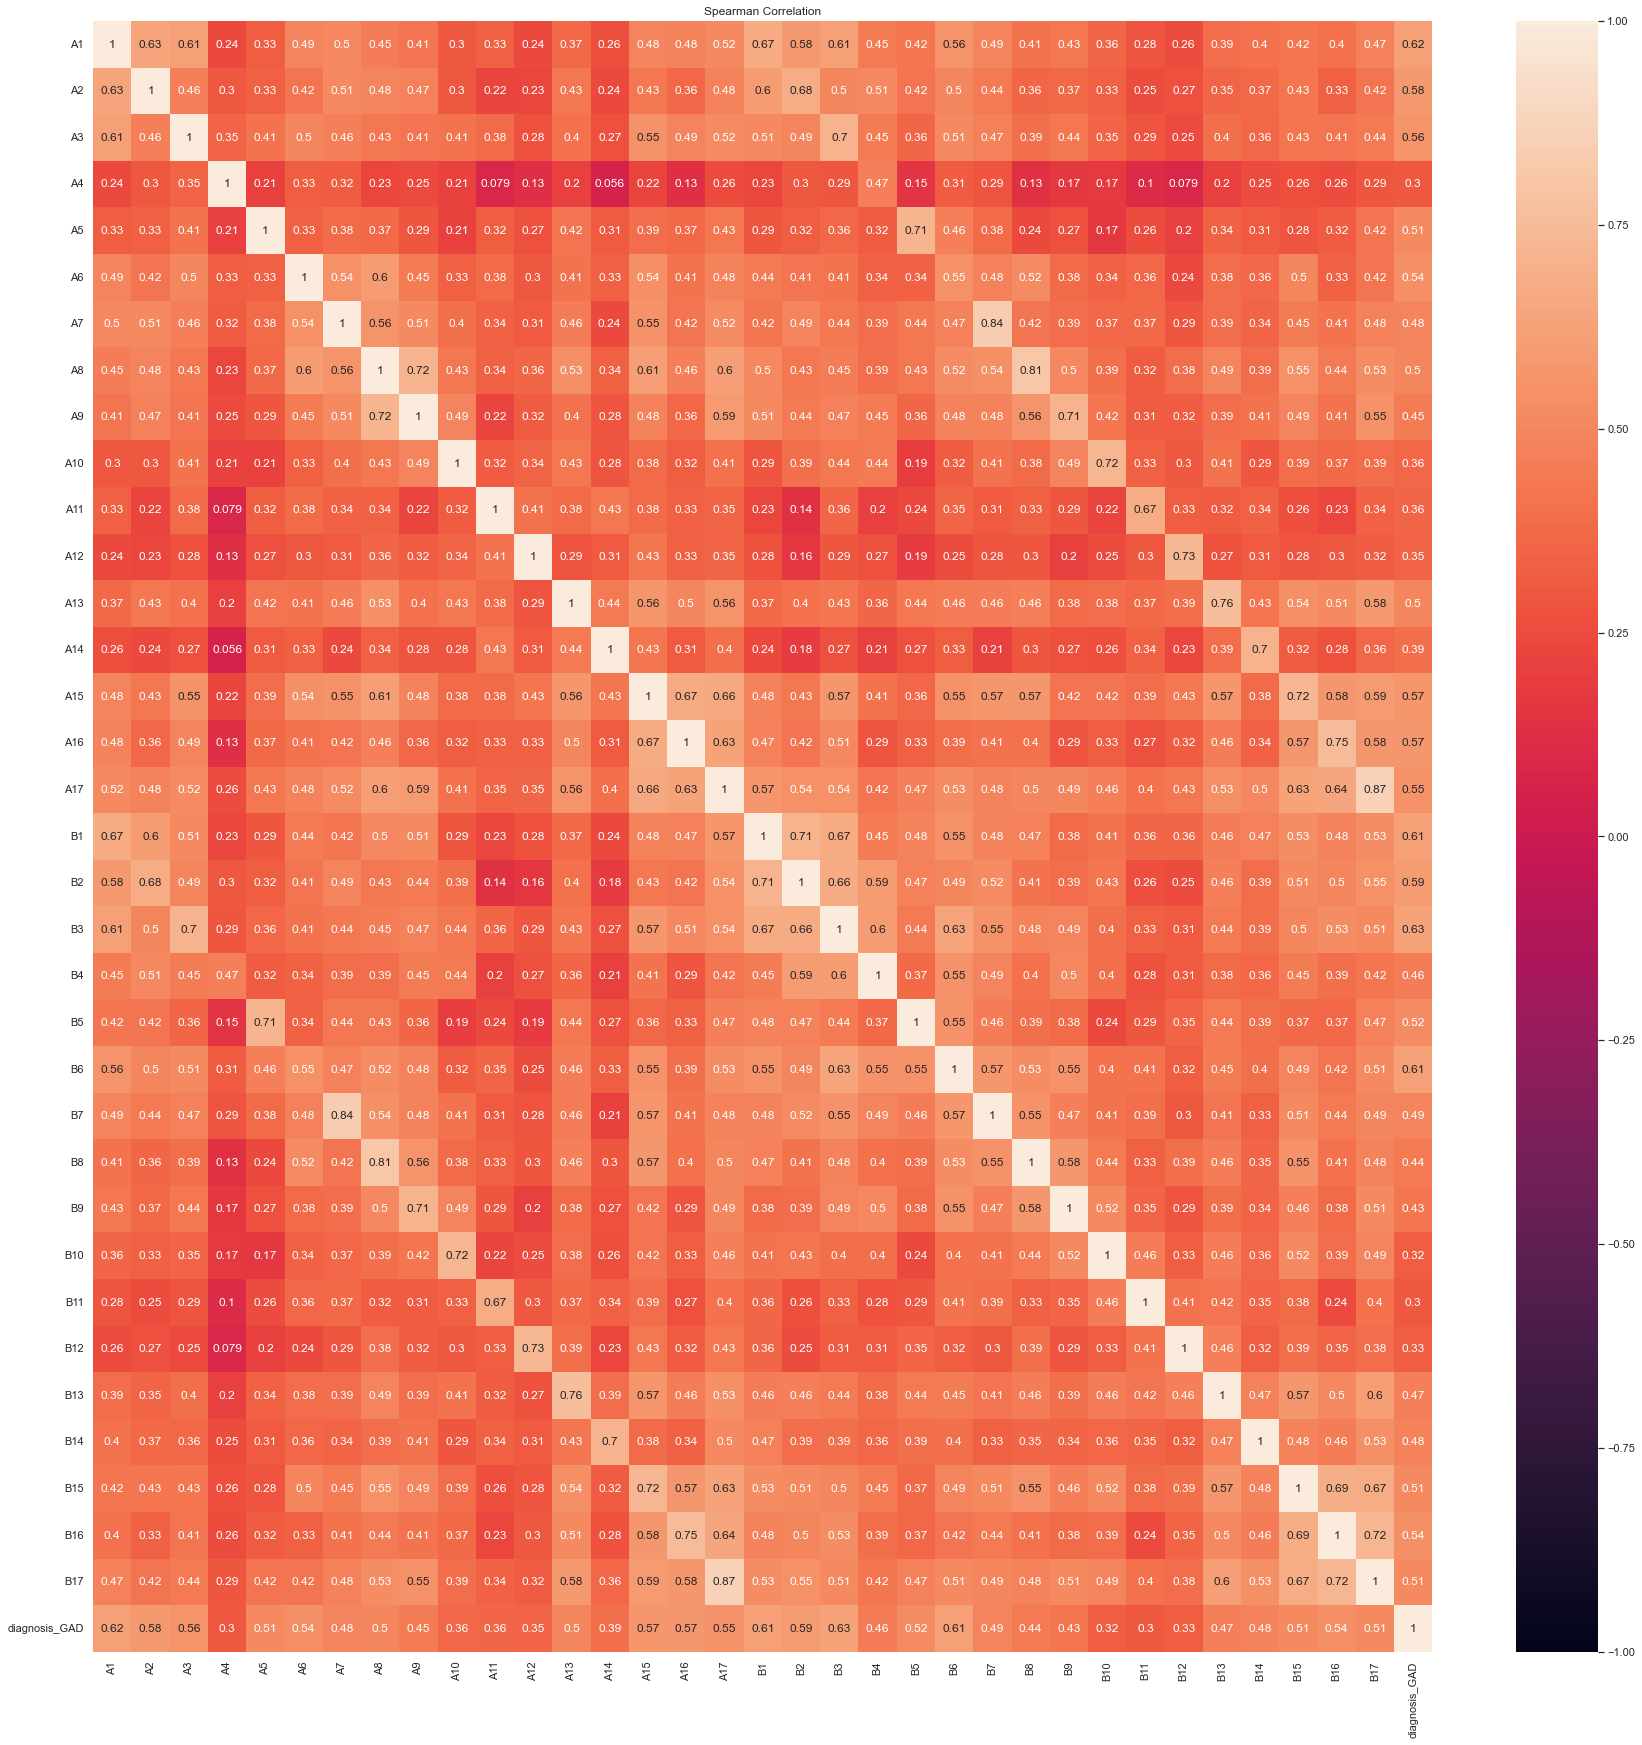

In [90]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(30,30))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
r_simple=display_correlation(df)

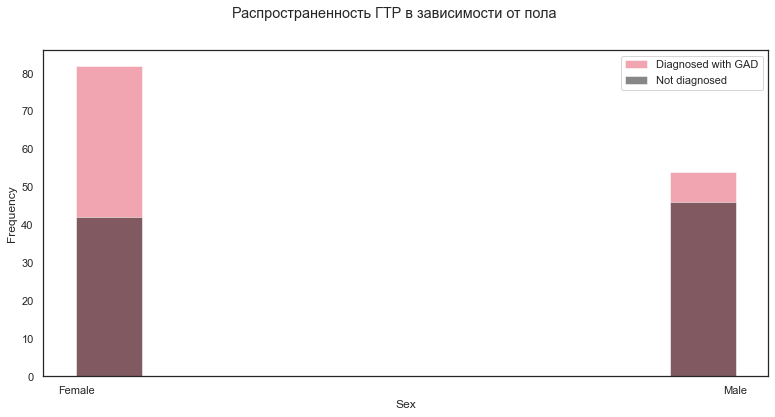

In [63]:
# Проанализируем распространенность заболеваний в зависимости от пола

fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["diagnosis_GAD"]==1]["Gender"], bins=10, alpha=0.5, color="#E44C62", label="Diagnosed with GAD")
ax.hist(df[df["diagnosis_GAD"]==0]["Gender"], bins=10, alpha=0.5, color="#111111", label="Not diagnosed")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Распространенность ГТР в зависимости от пола")

ax.legend();


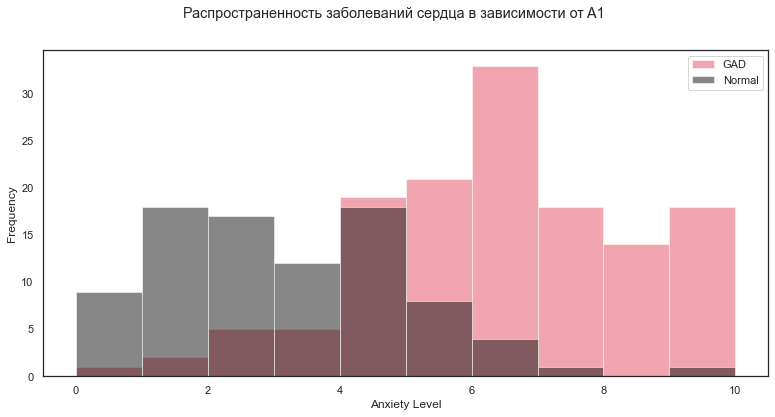

In [91]:
# Проанализируем распространенность ГТР в зависимости от тревожности

fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["diagnosis_GAD"]==1]["A1"], bins=10, alpha=0.5, color="#E44C62", label="GAD")
ax.hist(df[df["diagnosis_GAD"]==0]["A1"], bins=10, alpha=0.5, color="#111111", label="Normal")

ax.set_xlabel("Anxiety Level")
ax.set_ylabel("Frequency")

fig.suptitle("Распространенность заболеваний сердца в зависимости от A1")

ax.legend();

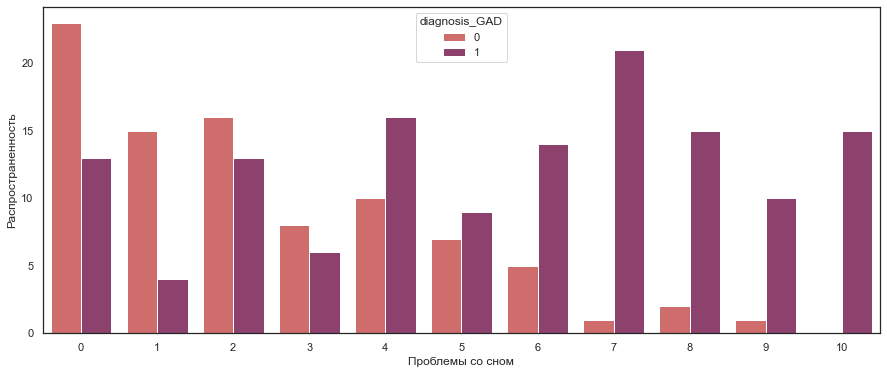

In [109]:

plt.figure(figsize = (15,6))
sns.countplot( x= df['A7'], 
hue = 'diagnosis_GAD', 
data = df, 
palette="flare", alpha=1)
plt.xlabel('Проблемы со сном')
plt.ylabel('Распространенность')
plt.show()

In [10]:
# Удалим целевые переменные form и diagnosis_GAD
df = df.drop(columns = ['form']) if 'form' in df else df
df = df.drop(columns = ['diagnosis_GAD']) if 'diagnosis_GAD' in df else df
df = df.drop(columns = ['Sample']) if 'Sample' in df else df
df.head(10)

,Gender,Age,A1,A2,A3,A4,A5,A6,A7,A7_symptom,...,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17
0,Female,21 - 30,6,7,4,6,2,3,4,FA,...,4,6,4,3,6,2,5,7,4,3
1,Male,21 - 30,2,3,5,4,1,3,2,FA,...,2,1,2,0,2,1,2,3,4,3
2,Female,21 - 30,5,4,7,4,6,3,5,SA,...,4,3,4,1,2,1,2,1,1,10
3,Female,21 - 30,9,6,8,9,2,6,9,FA,...,7,5,4,3,9,8,8,7,7,7
4,Male,21 - 30,10,8,9,10,4,9,9,SA,...,6,3,6,4,2,5,7,5,8,9
5,Female,21 - 30,6,4,10,8,5,7,2,NaN,...,7,6,6,1,0,2,4,4,4,4
6,Female,31 - 40,8,4,8,7,2,10,8,FA,...,4,4,7,5,3,6,7,7,8,10
7,Female,21 - 30,9,7,9,10,2,6,7,SA,...,3,6,4,4,5,7,7,8,9,9
8,Female,21 - 30,7,8,6,6,5,5,7,SA,...,4,3,6,4,7,6,6,6,7,8
9,Male,21 - 30,5,9,4,3,7,6,4,SA,...,1,1,1,0,1,1,2,3,2,4


In [11]:
df = df.drop(columns = ['Gender']) if 'Gender' in df else df
df = df.drop(columns = ['Age']) if 'Age' in df else df
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A7_symptom,A8,A9,...,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17
0,6,7,4,6,2,3,4,FA,7,8,...,4,6,4,3,6,2,5,7,4,3
1,2,3,5,4,1,3,2,FA,4,2,...,2,1,2,0,2,1,2,3,4,3
2,5,4,7,4,6,3,5,SA,5,6,...,4,3,4,1,2,1,2,1,1,10
3,9,6,8,9,2,6,9,FA,9,8,...,7,5,4,3,9,8,8,7,7,7
4,10,8,9,10,4,9,9,SA,6,6,...,6,3,6,4,2,5,7,5,8,9
5,6,4,10,8,5,7,2,NaN,3,4,...,7,6,6,1,0,2,4,4,4,4
6,8,4,8,7,2,10,8,FA,5,4,...,4,4,7,5,3,6,7,7,8,10
7,9,7,9,10,2,6,7,SA,6,7,...,3,6,4,4,5,7,7,8,9,9
8,7,8,6,6,5,5,7,SA,8,9,...,4,3,6,4,7,6,6,6,7,8
9,5,9,4,3,7,6,4,SA,4,3,...,1,1,1,0,1,1,2,3,2,4


In [12]:
# Удалим переменные с наименьшей и взаимной  высокой корреляцией 
df = df.drop(columns = ['B17']) if 'B17' in df else df
df = df.drop(columns = ['A17']) if 'A17' in df else df
df = df.drop(columns = ['A17_symptom']) if 'A17_symptom' in df else df
df = df.drop(columns = ['B7']) if 'B7' in df else df

df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A7_symptom,A8,A9,...,B6,B8,B9,B10,B11,B12,B13,B14,B15,B16
0,6,7,4,6,2,3,4,FA,7,8,...,8,4,6,4,3,6,2,5,7,4
1,2,3,5,4,1,3,2,FA,4,2,...,4,2,1,2,0,2,1,2,3,4
2,5,4,7,4,6,3,5,SA,5,6,...,4,4,3,4,1,2,1,2,1,1
3,9,6,8,9,2,6,9,FA,9,8,...,6,7,5,4,3,9,8,8,7,7
4,10,8,9,10,4,9,9,SA,6,6,...,7,6,3,6,4,2,5,7,5,8
5,6,4,10,8,5,7,2,NaN,3,4,...,8,7,6,6,1,0,2,4,4,4
6,8,4,8,7,2,10,8,FA,5,4,...,3,4,4,7,5,3,6,7,7,8
7,9,7,9,10,2,6,7,SA,6,7,...,6,3,6,4,4,5,7,7,8,9
8,7,8,6,6,5,5,7,SA,8,9,...,7,4,3,6,4,7,6,6,6,7
9,5,9,4,3,7,6,4,SA,4,3,...,3,1,1,1,0,1,1,2,3,2


In [13]:
# Проверка пустных значений
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   A1           224 non-null    int64 
 1   A2           224 non-null    int64 
 2   A3           224 non-null    int64 
 3   A4           224 non-null    int64 
 4   A5           224 non-null    int64 
 5   A6           224 non-null    int64 
 6   A7           224 non-null    int64 
 7   A7_symptom   157 non-null    object
 8   A8           224 non-null    int64 
 9   A9           224 non-null    int64 
 10  A10          224 non-null    int64 
 11  A11          224 non-null    int64 
 12  A11_symptom  127 non-null    object
 13  A12          224 non-null    int64 
 14  A12_symptom  107 non-null    object
 15  A13          224 non-null    int64 
 16  A13_symptom  166 non-null    object
 17  A14          224 non-null    int64 
 18  A14_symptom  105 non-null    object
 19  A15          224 non-null    

In [14]:
# Проверка на дубликаты

duplicates = df.duplicated(keep = False)
duplicates.value_counts()

False    224
dtype: int64

In [15]:
# Заполнение пустот
df.fillna(0)

,A1,A2,A3,A4,A5,A6,A7,A7_symptom,A8,A9,...,B6,B8,B9,B10,B11,B12,B13,B14,B15,B16
0,6,7,4,6,2,3,4,FA,7,8,...,8,4,6,4,3,6,2,5,7,4
1,2,3,5,4,1,3,2,FA,4,2,...,4,2,1,2,0,2,1,2,3,4
2,5,4,7,4,6,3,5,SA,5,6,...,4,4,3,4,1,2,1,2,1,1
3,9,6,8,9,2,6,9,FA,9,8,...,6,7,5,4,3,9,8,8,7,7
4,10,8,9,10,4,9,9,SA,6,6,...,7,6,3,6,4,2,5,7,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1,1,5,5,4,4,7,FA,7,5,...,5,9,5,3,3,4,4,4,4,5
220,6,5,7,5,5,2,0,0,6,5,...,3,6,2,2,1,1,2,0,3,4
221,7,8,8,4,3,10,10,SA,6,6,...,2,6,4,8,7,6,10,0,8,0
222,6,4,3,4,0,4,8,FA,6,6,...,1,6,2,9,9,0,2,0,1,0


In [16]:
# Стьюдент, квантили, среднее
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,B6,B8,B9,B10,B11,B12,B13,B14,B15,B16
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,...,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,4.714286,4.776786,5.763393,5.071429,3.040179,4.437500,4.267857,5.049107,4.571429,4.205357,...,4.258929,4.647321,4.214286,4.031250,2.950893,2.843750,3.647321,2.933036,4.281250,4.352679
std,2.582898,2.672597,2.604291,2.578679,2.689156,2.795837,3.167894,2.866585,2.953190,2.902414,...,2.697767,2.859285,2.825028,2.841699,2.727094,2.850168,2.650948,2.778840,2.786322,2.893582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000
50%,5.000000,5.000000,6.000000,5.000000,2.000000,4.000000,4.000000,5.000000,4.500000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000
75%,6.000000,7.000000,8.000000,7.000000,4.000000,7.000000,7.000000,7.000000,7.000000,6.000000,...,6.000000,7.000000,6.000000,6.000000,4.000000,4.000000,5.000000,5.000000,6.250000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   A1           224 non-null    int64 
 1   A2           224 non-null    int64 
 2   A3           224 non-null    int64 
 3   A4           224 non-null    int64 
 4   A5           224 non-null    int64 
 5   A6           224 non-null    int64 
 6   A7           224 non-null    int64 
 7   A7_symptom   157 non-null    object
 8   A8           224 non-null    int64 
 9   A9           224 non-null    int64 
 10  A10          224 non-null    int64 
 11  A11          224 non-null    int64 
 12  A11_symptom  127 non-null    object
 13  A12          224 non-null    int64 
 14  A12_symptom  107 non-null    object
 15  A13          224 non-null    int64 
 16  A13_symptom  166 non-null    object
 17  A14          224 non-null    int64 
 18  A14_symptom  105 non-null    object
 19  A15          224 non-null    

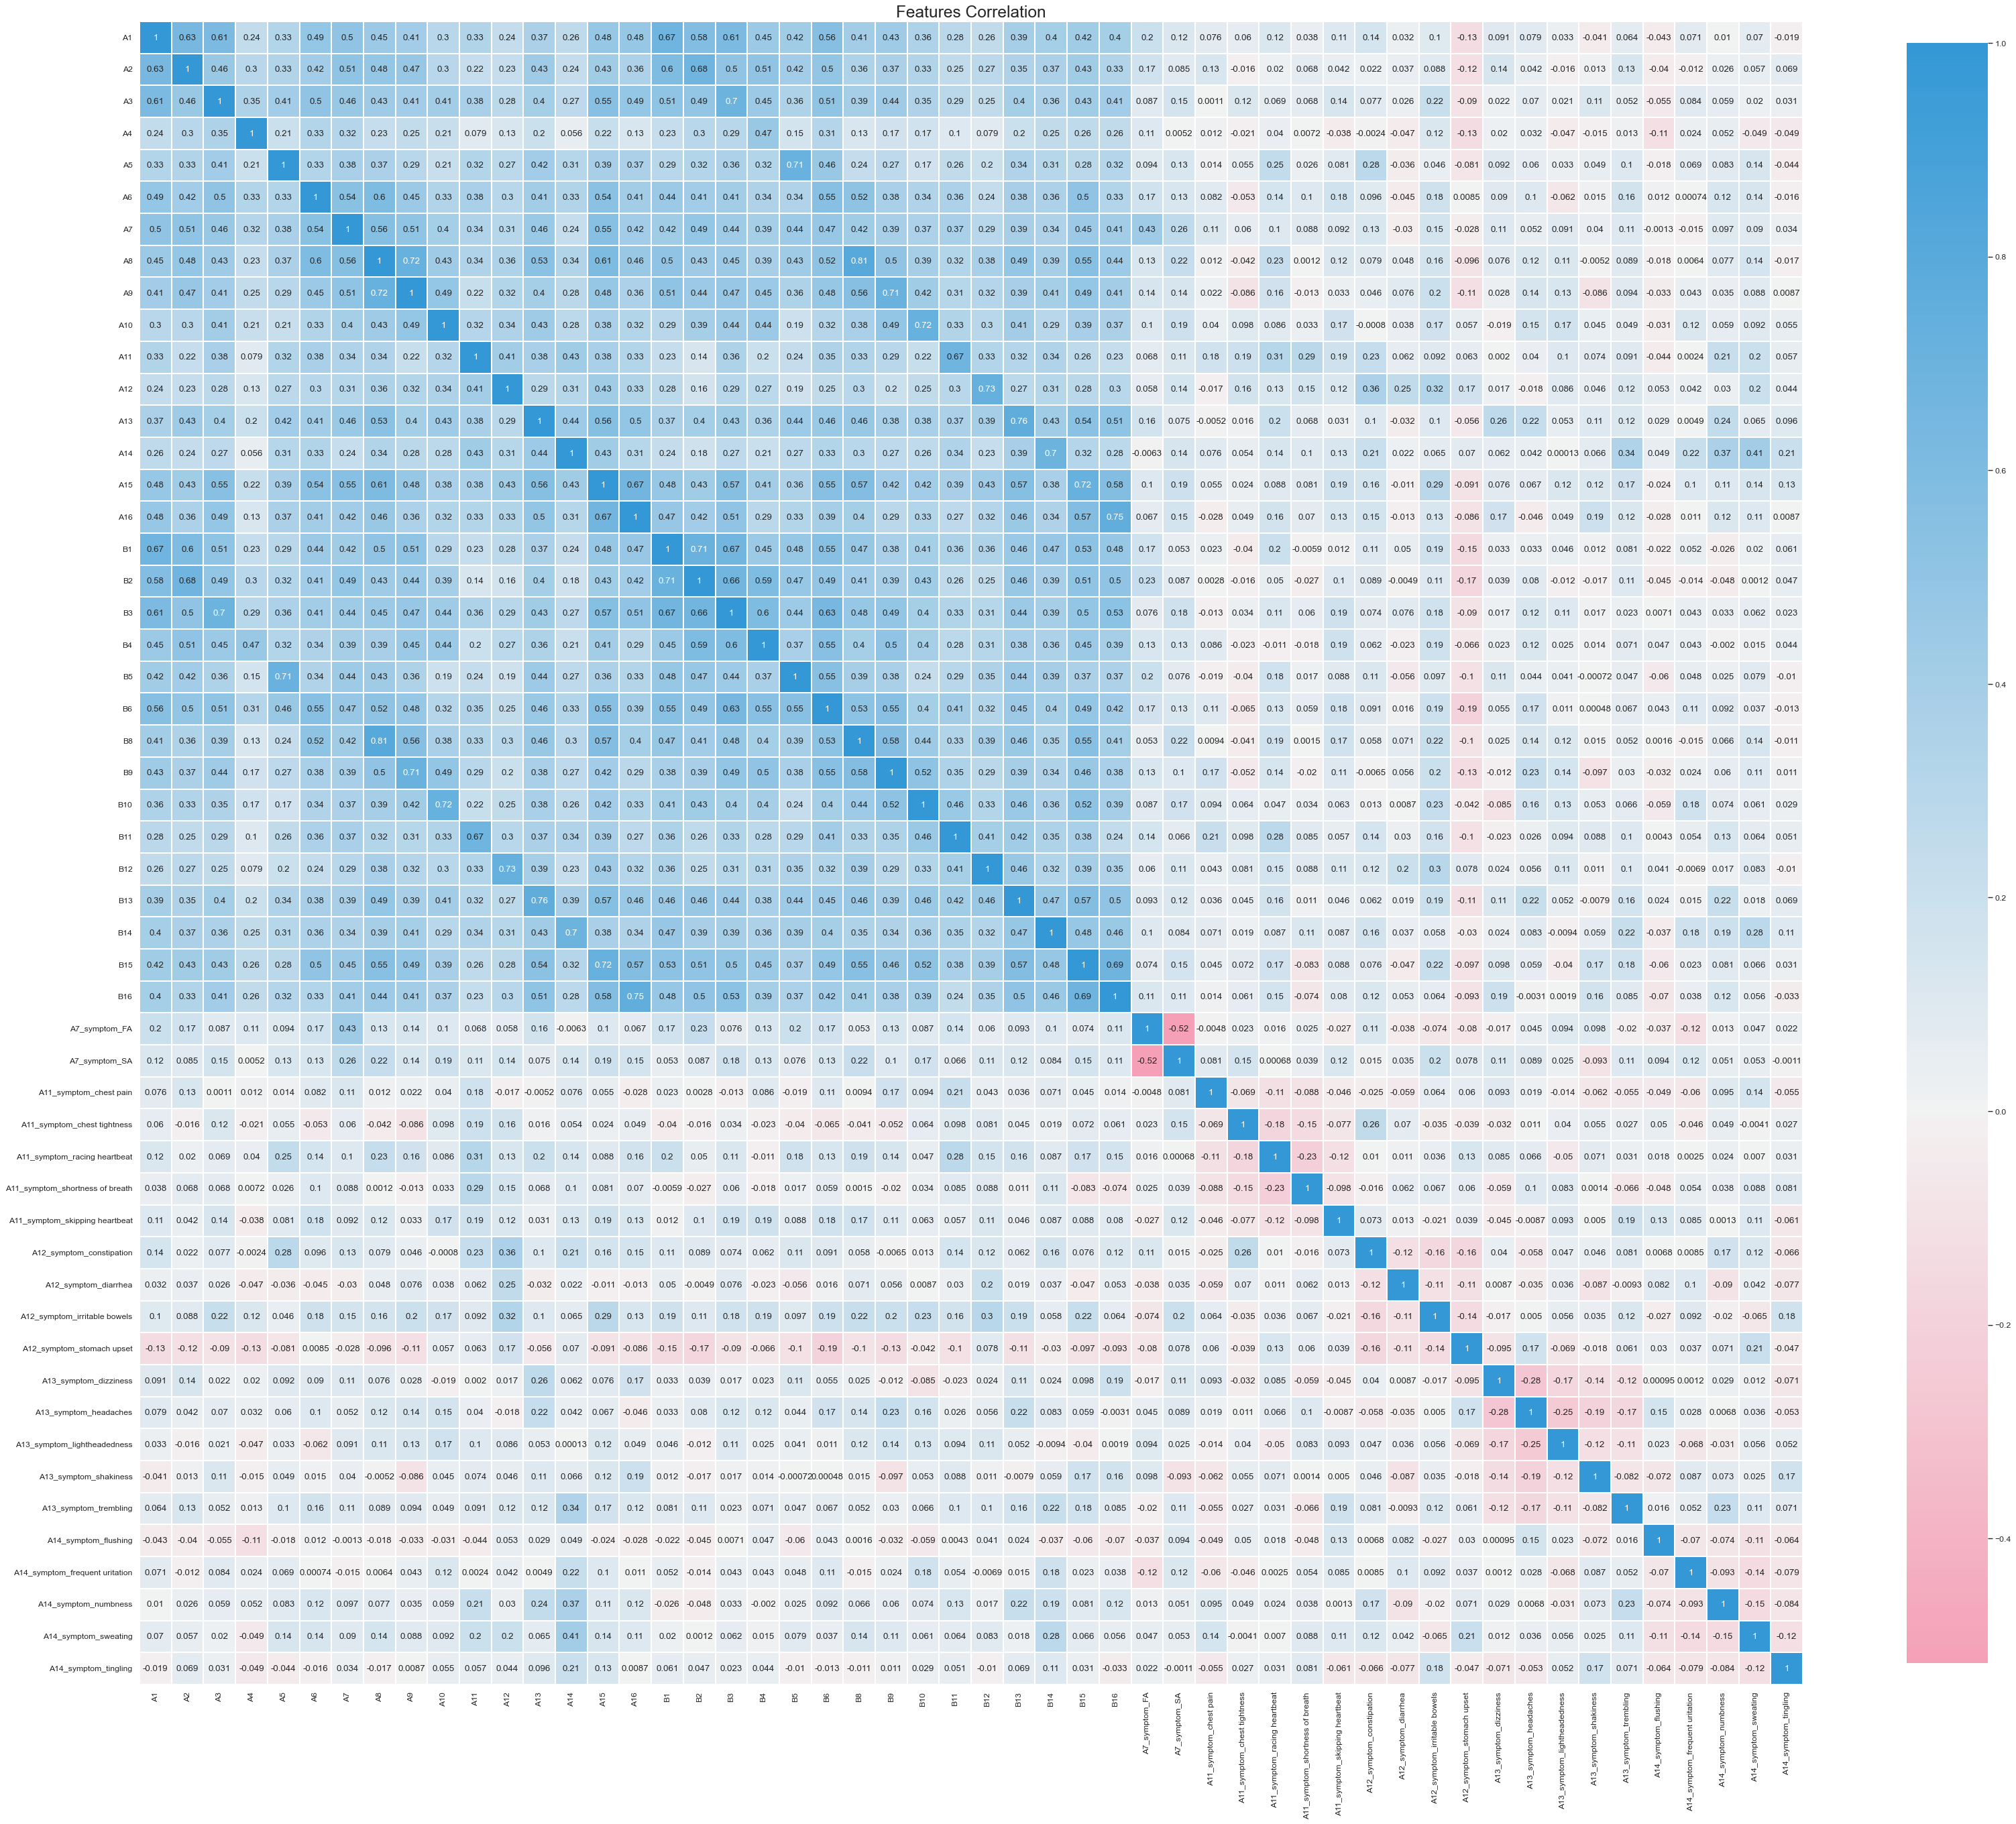

In [370]:
plt.figure(figsize=(50,50), dpi= 80)
cmap = sns.diverging_palette(0, 240, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap=cmap, center=0, annot=True, 
square=True, linewidth=0.3, cbar_kws={"shrink": .8})

plt.title('Features Correlation', fontsize=22)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

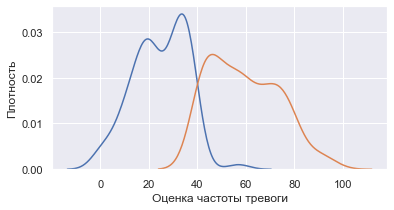

In [90]:
fig = sns.kdeplot(df[df['diagnosis_GAD'] == 0]['N_GAD'], label = 'gad')
fig = sns.kdeplot(df[df['diagnosis_GAD'] == 1]['N_GAD'], label = 'none')        
fig.set(xlabel='Оценка частоты тревоги', ylabel='Плотность')    
plt.show()

In [18]:
df = df.drop(columns = ['B8']) if 'B8' in df else df

In [19]:
# Категориальные признаки

df = pd.get_dummies(df, drop_first = False)
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13_symptom_dizziness,A13_symptom_headaches,A13_symptom_lightheadedness,A13_symptom_shakiness,A13_symptom_trembling,A14_symptom_flushing,A14_symptom_frequent uritation,A14_symptom_numbness,A14_symptom_sweating,A14_symptom_tingling
0,6,7,4,6,2,3,4,7,8,3,...,0,1,0,0,0,0,0,0,0,0
1,2,3,5,4,1,3,2,4,2,0,...,0,1,0,0,0,0,0,0,0,0
2,5,4,7,4,6,3,5,5,6,2,...,0,1,0,0,0,0,0,0,1,0
3,9,6,8,9,2,6,9,9,8,3,...,0,0,1,0,0,0,0,0,0,0
4,10,8,9,10,4,9,9,6,6,4,...,0,1,0,0,0,0,0,0,0,0
5,6,4,10,8,5,7,2,3,4,5,...,0,0,0,0,0,0,0,0,0,0
6,8,4,8,7,2,10,8,5,4,7,...,1,0,0,0,0,0,0,0,0,0
7,9,7,9,10,2,6,7,6,7,5,...,0,0,0,0,0,0,0,0,0,0
8,7,8,6,6,5,5,7,8,9,3,...,0,1,0,0,0,0,1,0,0,0
9,5,9,4,3,7,6,4,4,3,4,...,1,0,0,0,0,0,0,0,0,0


In [20]:
# Задаем массив обучающих данных
df.to_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   A1                               224 non-null    int64
 1   A2                               224 non-null    int64
 2   A3                               224 non-null    int64
 3   A4                               224 non-null    int64
 4   A5                               224 non-null    int64
 5   A6                               224 non-null    int64
 6   A7                               224 non-null    int64
 7   A8                               224 non-null    int64
 8   A9                               224 non-null    int64
 9   A10                              224 non-null    int64
 10  A11                              224 non-null    int64
 11  A12                              224 non-null    int64
 12  A13                              224 non-null    i

In [21]:
f=open('df.csv','r')
txt=f.read()
f.close()
list1=txt.split('\n')
X=[]
#print(list1[1::])
for i in list1[1::]:
    elem=i.split(',')
    r=[float(item) for item in elem if len(item)>0]
    X.append(r[1::])
print(X)

[[6.0, 7.0, 4.0, 6.0, 2.0, 3.0, 4.0, 7.0, 8.0, 3.0, 1.0, 0.0, 2.0, 2.0, 3.0, 2.0, 9.0, 8.0, 7.0, 8.0, 4.0, 8.0, 6.0, 4.0, 3.0, 6.0, 2.0, 5.0, 7.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 5.0, 4.0, 1.0, 3.0, 2.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 1.0, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 3.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 4.0, 7.0, 4.0, 6.0, 3.0, 5.0, 5.0, 6.0, 2.0, 5.0, 1.0, 4.0, 4.0, 6.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [9.0, 6.0, 8.0, 9.0, 2.0, 6.0, 9.0, 9.0, 8.0, 3.0, 2.0, 3.0, 5.0, 3.0, 8.0, 7.0, 10.0, 9.0, 8.0, 7.0, 8.0, 6.0, 5.0, 4.0, 3.0, 9.0, 8.0, 8.0, 7.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0

In [97]:
X=np.array([[6.0, 7.0, 4.0, 6.0, 2.0, 3.0, 4.0, 7.0, 8.0, 3.0, 1.0, 0.0, 2.0, 2.0, 3.0, 2.0, 9.0, 8.0, 7.0, 8.0, 4.0, 8.0, 6.0, 4.0, 3.0, 6.0, 2.0, 5.0, 7.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 5.0, 4.0, 1.0, 3.0, 2.0, 4.0, 2.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 1.0, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 3.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 4.0, 7.0, 4.0, 6.0, 3.0, 5.0, 5.0, 6.0, 2.0, 5.0, 1.0, 4.0, 4.0, 6.0, 3.0, 2.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [9.0, 6.0, 8.0, 9.0, 2.0, 6.0, 9.0, 9.0, 8.0, 3.0, 2.0, 3.0, 5.0, 3.0, 8.0, 7.0, 10.0, 9.0, 8.0, 7.0, 8.0, 6.0, 5.0, 4.0, 3.0, 9.0, 8.0, 8.0, 7.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 8.0, 9.0, 10.0, 4.0, 9.0, 9.0, 6.0, 6.0, 4.0, 4.0, 2.0, 7.0, 2.0, 4.0, 7.0, 7.0, 8.0, 9.0, 5.0, 5.0, 7.0, 3.0, 6.0, 4.0, 2.0, 5.0, 7.0, 5.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 4.0, 10.0, 8.0, 5.0, 7.0, 2.0, 3.0, 4.0, 5.0, 5.0, 0.0, 3.0, 1.0, 3.0, 4.0, 10.0, 9.0, 7.0, 8.0, 6.0, 8.0, 6.0, 6.0, 1.0, 0.0, 2.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 4.0, 8.0, 7.0, 2.0, 10.0, 8.0, 5.0, 4.0, 7.0, 3.0, 2.0, 4.0, 0.0, 7.0, 4.0, 10.0, 10.0, 8.0, 6.0, 4.0, 3.0, 4.0, 7.0, 5.0, 3.0, 6.0, 7.0, 7.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.0, 7.0, 9.0, 10.0, 2.0, 6.0, 7.0, 6.0, 7.0, 5.0, 2.0, 3.0, 3.0, 3.0, 8.0, 5.0, 9.0, 9.0, 8.0, 9.0, 7.0, 6.0, 6.0, 4.0, 4.0, 5.0, 7.0, 7.0, 8.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 8.0, 6.0, 6.0, 5.0, 5.0, 7.0, 8.0, 9.0, 3.0, 4.0, 0.0, 4.0, 4.0, 9.0, 7.0, 9.0, 9.0, 10.0, 8.0, 9.0, 7.0, 3.0, 6.0, 4.0, 7.0, 6.0, 6.0, 6.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 9.0, 4.0, 3.0, 7.0, 6.0, 4.0, 4.0, 3.0, 4.0, 0.0, 1.0, 4.0, 3.0, 2.0, 3.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 3.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 6.0, 7.0, 2.0, 4.0, 1.0, 2.0, 3.0, 4.0, 2.0, 1.0, 2.0, 5.0, 4.0, 5.0, 7.0, 7.0, 8.0, 9.0, 5.0, 5.0, 7.0, 3.0, 6.0, 4.0, 2.0, 5.0, 7.0, 5.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [9.0, 6.0, 7.0, 5.0, 6.0, 9.0, 7.0, 6.0, 5.0, 5.0, 3.0, 0.0, 3.0, 2.0, 6.0, 8.0, 6.0, 9.0, 6.0, 7.0, 7.0, 7.0, 6.0, 8.0, 1.0, 0.0, 2.0, 2.0, 9.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 7.0, 4.0, 8.0, 3.0, 8.0, 8.0, 9.0, 8.0, 2.0, 4.0, 3.0, 6.0, 3.0, 3.0, 5.0, 9.0, 9.0, 4.0, 5.0, 6.0, 4.0, 7.0, 9.0, 3.0, 4.0, 7.0, 9.0, 9.0, 10.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 5.0, 6.0, 4.0, 2.0, 9.0, 7.0, 6.0, 7.0, 5.0, 2.0, 4.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0, 7.0, 6.0, 4.0, 3.0, 4.0, 7.0, 5.0, 3.0, 8.0, 8.0, 9.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [5.0, 4.0, 9.0, 7.0, 3.0, 8.0, 6.0, 7.0, 8.0, 4.0, 0.0, 5.0, 3.0, 2.0, 4.0, 8.0, 6.0, 6.0, 4.0, 9.0, 6.0, 4.0, 8.0, 4.0, 0.0, 1.0, 1.0, 6.0, 6.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 6.0, 3.0, 2.0, 2.0, 4.0, 0.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 4.0, 3.0, 5.0, 6.0, 6.0, 4.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 4.0, 3.0, 4.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 2.0, 8.0, 0.0, 1.0, 4.0, 1.0, 2.0, 1.0, 5.0, 4.0, 2.0, 6.0, 6.0, 4.0, 6.0, 0.0, 3.0, 3.0, 0.0, 1.0, 2.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 3.0, 2.0, 8.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 7.0, 2.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 7.0, 9.0, 5.0, 6.0, 9.0, 8.0, 9.0, 10.0, 5.0, 1.0, 0.0, 4.0, 3.0, 7.0, 6.0, 7.0, 8.0, 8.0, 6.0, 9.0, 9.0, 10.0, 3.0, 3.0, 0.0, 4.0, 7.0, 5.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 6.0, 2.0, 8.0, 2.0, 2.0, 8.0, 7.0, 4.0, 4.0, 5.0, 3.0, 3.0, 8.0, 7.0, 6.0, 6.0, 7.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 5.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 7.0, 8.0, 7.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 6.0, 4.0, 4.0, 5.0, 4.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 4.0, 4.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [2.0, 5.0, 6.0, 3.0, 4.0, 0.0, 0.0, 3.0, 4.0, 4.0, 2.0, 3.0, 6.0, 0.0, 7.0, 6.0, 7.0, 7.0, 6.0, 6.0, 5.0, 0.0, 4.0, 4.0, 3.0, 2.0, 4.0, 0.0, 1.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.0, 6.0, 4.0, 0.0, 1.0, 4.0, 4.0, 2.0, 5.0, 6.0, 5.0, 0.0, 6.0, 3.0, 3.0, 6.0, 8.0, 8.0, 7.0, 0.0, 6.0, 6.0, 4.0, 5.0, 5.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 10.0, 8.0, 5.0, 6.0, 2.0, 7.0, 4.0, 6.0, 7.0, 3.0, 6.0, 5.0, 4.0, 4.0, 5.0, 6.0, 4.0, 4.0, 7.0, 7.0, 9.0, 7.0, 9.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [10.0, 6.0, 6.0, 3.0, 4.0, 3.0, 5.0, 5.0, 7.0, 4.0, 4.0, 2.0, 8.0, 2.0, 3.0, 6.0, 4.0, 5.0, 6.0, 5.0, 6.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 8.0, 5.0, 6.0, 7.0, 6.0, 7.0, 6.0, 7.0, 2.0, 5.0, 8.0, 5.0, 0.0, 7.0, 7.0, 8.0, 9.0, 7.0, 6.0, 4.0, 3.0, 4.0, 7.0, 5.0, 3.0, 6.0, 7.0, 8.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 9.0, 6.0, 3.0, 4.0, 4.0, 8.0, 6.0, 5.0, 5.0, 3.0, 2.0, 4.0, 2.0, 7.0, 8.0, 9.0, 10.0, 8.0, 6.0, 6.0, 7.0, 5.0, 5.0, 3.0, 2.0, 4.0, 2.0, 7.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 8.0, 8.0, 8.0, 4.0, 3.0, 7.0, 7.0, 6.0, 5.0, 2.0, 2.0, 8.0, 1.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 9.0, 10.0, 9.0, 6.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 7.0, 9.0, 6.0, 3.0, 4.0, 6.0, 4.0, 5.0, 3.0, 1.0, 3.0, 7.0, 3.0, 9.0, 9.0, 10.0, 9.0, 10.0, 7.0, 8.0, 4.0, 5.0, 4.0, 3.0, 9.0, 8.0, 8.0, 7.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 9.0, 10.0, 9.0, 7.0, 5.0, 6.0, 4.0, 5.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0, 1.0, 4.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 4.0, 2.0, 1.0, 0.0, 1.0, 4.0, 3.0, 4.0, 2.0, 1.0, 4.0, 2.0, 1.0, 0.0, 2.0, 2.0, 4.0, 4.0, 5.0, 0.0, 4.0, 5.0, 6.0, 7.0, 6.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 2.0, 0.0, 5.0, 2.0, 3.0, 0.0, 1.0, 2.0, 2.0, 3.0, 0.0, 7.0, 2.0, 3.0, 2.0, 0.0, 3.0, 0.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 0.0, 3.0, 3.0, 7.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 8.0, 4.0, 10.0, 8.0, 9.0, 10.0, 6.0, 4.0, 9.0, 8.0, 2.0, 7.0, 8.0, 0.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 4.0, 3.0, 3.0, 4.0, 9.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 9.0, 10.0, 6.0, 2.0, 10.0, 10.0, 9.0, 8.0, 5.0, 5.0, 4.0, 9.0, 1.0, 5.0, 9.0, 9.0, 10.0, 9.0, 7.0, 9.0, 6.0, 7.0, 7.0, 7.0, 9.0, 8.0, 8.0, 7.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 5.0, 6.0, 9.0, 3.0, 6.0, 5.0, 6.0, 5.0, 4.0, 2.0, 0.0, 8.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 5.0, 4.0, 3.0, 4.0, 0.0, 2.0, 2.0, 3.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [6.0, 6.0, 4.0, 5.0, 2.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 0.0, 2.0, 1.0, 4.0, 4.0, 2.0, 5.0, 3.0, 3.0, 1.0, 4.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 9.0, 8.0, 8.0, 9.0, 2.0, 9.0, 10.0, 9.0, 10.0, 4.0, 7.0, 6.0, 3.0, 6.0, 10.0, 10.0, 9.0, 9.0, 4.0, 4.0, 5.0, 1.0, 1.0, 3.0, 5.0, 6.0, 5.0, 5.0, 9.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 6.0, 7.0, 6.0, 7.0, 5.0, 4.0, 5.0, 6.0, 6.0, 5.0, 4.0, 6.0, 2.0, 2.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 8.0, 5.0, 7.0, 6.0, 7.0, 6.0, 5.0, 4.0, 5.0, 3.0, 3.0, 7.0, 4.0, 3.0, 3.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 2.0, 4.0, 8.0, 1.0, 4.0, 3.0, 4.0, 5.0, 4.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 4.0, 2.0, 3.0, 0.0, 3.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 7.0, 9.0, 6.0, 3.0, 8.0, 9.0, 10.0, 8.0, 6.0, 7.0, 7.0, 2.0, 7.0, 10.0, 7.0, 8.0, 9.0, 5.0, 5.0, 7.0, 3.0, 6.0, 4.0, 2.0, 5.0, 7.0, 5.0, 8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 4.0, 8.0, 6.0, 7.0, 2.0, 8.0, 9.0, 8.0, 9.0, 4.0, 5.0, 6.0, 4.0, 8.0, 9.0, 1.0, 2.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 5.0, 4.0, 0.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 1.0, 4.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 9.0, 6.0, 6.0, 3.0, 8.0, 10.0, 9.0, 8.0, 9.0, 8.0, 9.0, 8.0, 5.0, 8.0, 9.0, 10.0, 9.0, 8.0, 9.0, 6.0, 8.0, 6.0, 6.0, 4.0, 5.0, 4.0, 9.0, 10.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [3.0, 8.0, 8.0, 9.0, 6.0, 3.0, 2.0, 4.0, 5.0, 4.0, 3.0, 0.0, 7.0, 3.0, 4.0, 4.0, 3.0, 4.0, 7.0, 8.0, 6.0, 7.0, 4.0, 2.0, 1.0, 0.0, 2.0, 2.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 9.0, 0.0, 6.0, 2.0, 4.0, 6.0, 5.0, 6.0, 5.0, 3.0, 2.0, 9.0, 8.0, 9.0, 7.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 6.0, 7.0, 7.0, 4.0, 3.0, 6.0, 7.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [4.0, 6.0, 7.0, 8.0, 4.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 1.0, 6.0, 2.0, 3.0, 2.0, 9.0, 8.0, 6.0, 7.0, 7.0, 8.0, 9.0, 7.0, 8.0, 6.0, 8.0, 9.0, 10.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 9.0, 10.0, 3.0, 9.0, 10.0, 9.0, 8.0, 9.0, 8.0, 6.0, 8.0, 6.0, 5.0, 6.0, 8.0, 9.0, 7.0, 6.0, 4.0, 3.0, 4.0, 7.0, 5.0, 3.0, 6.0, 7.0, 7.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [8.0, 9.0, 10.0, 9.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 6.0, 7.0, 6.0, 5.0, 4.0, 3.0, 6.0, 4.0, 1.0, 2.0, 2.0, 6.0, 4.0, 4.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 5.0, 6.0, 7.0, 2.0, 2.0, 4.0, 6.0, 7.0, 6.0, 3.0, 0.0, 4.0, 0.0, 0.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 1.0, 1.0, 4.0, 0.0, 5.0, 0.0, 0.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 8.0, 6.0, 10.0, 8.0, 7.0, 9.0, 10.0, 10.0, 7.0, 5.0, 10.0, 7.0, 4.0, 10.0, 10.0, 9.0, 6.0, 9.0, 8.0, 6.0, 8.0, 6.0, 8.0, 3.0, 5.0, 7.0, 2.0, 2.0, 6.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [7.0, 8.0, 10.0, 6.0, 7.0, 4.0, 6.0, 8.0, 9.0, 9.0, 6.0, 6.0, 8.0, 8.0, 7.0, 4.0, 10.0, 8.0, 10.0, 6.0, 5.0, 7.0, 7.0, 6.0, 3.0, 6.0, 5.0, 8.0, 4.0, 6.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 2.0, 6.0, 3.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.0, 5.0, 3.0, 3.0, 8.0, 8.0, 9.0, 3.0, 1.0, 5.0, 2.0, 2.0, 4.0, 5.0, 5.0, 7.0, 3.0, 2.0, 1.0, 8.0, 9.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [6.0, 4.0, 5.0, 0.0, 3.0, 3.0, 4.0, 6.0, 7.0, 9.0, 4.0, 4.0, 5.0, 4.0, 4.0, 8.0, 6.0, 4.0, 6.0, 0.0, 6.0, 4.0, 7.0, 8.0, 2.0, 3.0, 4.0, 5.0, 8.0, 7.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [2.0, 2.0, 2.0, 2.0, 6.0, 1.0, 4.0, 4.0, 4.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, 4.0, 3.0, 0.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 4.0, 6.0, 0.0, 1.0, 3.0, 2.0, 5.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 4.0, 4.0, 6.0, 0.0, 5.0, 5.0, 5.0, 6.0, 0.0, 0.0, 0.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 1.0, 5.0, 3.0, 4.0, 3.0, 6.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 6.0, 2.0, 0.0, 0.0, 4.0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 7.0, 6.0, 4.0, 5.0, 9.0, 9.0, 8.0, 6.0, 9.0, 3.0, 7.0, 4.0, 2.0, 8.0, 9.0, 7.0, 8.0, 5.0, 10.0, 6.0, 7.0, 8.0, 4.0, 4.0, 8.0, 6.0, 2.0, 5.0, 9.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 3.0, 4.0, 6.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 2.0, 0.0, 4.0, 0.0, 4.0, 4.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 5.0, 4.0, 2.0, 0.0, 4.0, 5.0, 2.0, 4.0, 4.0, 0.0, 2.0, 3.0, 2.0, 3.0, 0.0, 1.0, 3.0, 3.0, 2.0, 0.0, 2.0, 3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 5.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 4.0, 2.0, 0.0, 0.0, 8.0, 2.0, 3.0, 2.0, 1.0, 5.0, 4.0, 5.0, 4.0, 3.0, 1.0, 3.0, 0.0, 0.0, 6.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 2.0, 4.0, 4.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [6.0, 6.0, 5.0, 6.0, 5.0, 8.0, 7.0, 7.0, 7.0, 6.0, 3.0, 5.0, 6.0, 3.0, 7.0, 5.0, 5.0, 3.0, 8.0, 7.0, 6.0, 9.0, 8.0, 5.0, 2.0, 4.0, 5.0, 2.0, 4.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [5.0, 4.0, 6.0, 5.0, 2.0, 4.0, 2.0, 6.0, 4.0, 5.0, 2.0, 5.0, 7.0, 6.0, 7.0, 3.0, 6.0, 5.0, 6.0, 6.0, 2.0, 4.0, 5.0, 5.0, 2.0, 5.0, 7.0, 6.0, 5.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 5.0, 5.0, 4.0, 3.0, 5.0, 6.0, 5.0, 6.0, 4.0, 2.0, 5.0, 4.0, 4.0, 6.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 6.0, 4.0, 2.0, 3.0, 4.0, 3.0, 6.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [5.0, 6.0, 6.0, 5.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 5.0, 5.0, 5.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 7.0, 4.0, 0.0, 4.0, 5.0, 3.0, 6.0, 0.0, 0.0, 0.0, 4.0, 0.0, 5.0, 9.0, 4.0, 6.0, 6.0, 4.0, 0.0, 6.0, 7.0, 0.0, 0.0, 0.0, 3.0, 0.0, 7.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 1.0, 5.0, 3.0, 3.0, 4.0, 6.0, 6.0, 6.0, 3.0, 2.0, 2.0, 4.0, 2.0, 7.0, 5.0, 4.0, 1.0, 5.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [3.0, 0.0, 5.0, 6.0, 0.0, 3.0, 4.0, 3.0, 0.0, 10.0, 7.0, 8.0, 0.0, 0.0, 6.0, 7.0, 5.0, 0.0, 6.0, 3.0, 0.0, 1.0, 0.0, 5.0, 2.0, 5.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 6.0, 7.0, 0.0, 5.0, 4.0, 10.0, 10.0, 9.0, 8.0, 10.0, 8.0, 6.0, 10.0, 8.0, 3.0, 2.0, 6.0, 6.0, 0.0, 5.0, 10.0, 9.0, 8.0, 10.0, 8.0, 6.0, 10.0, 8.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [7.0, 6.0, 6.0, 5.0, 8.0, 7.0, 8.0, 10.0, 9.0, 7.0, 3.0, 2.0, 9.0, 7.0, 8.0, 10.0, 6.0, 5.0, 5.0, 6.0, 8.0, 6.0, 8.0, 7.0, 3.0, 2.0, 8.0, 6.0, 7.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [4.0, 3.0, 4.0, 1.0, 4.0, 3.0, 0.0, 3.0, 6.0, 3.0, 0.0, 2.0, 5.0, 0.0, 3.0, 4.0, 6.0, 4.0, 4.0, 3.0, 3.0, 3.0, 6.0, 3.0, 0.0, 1.0, 4.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 4.0, 4.0, 3.0, 2.0, 6.0, 0.0, 5.0, 6.0, 3.0, 0.0, 0.0, 6.0, 6.0, 4.0, 7.0, 4.0, 5.0, 5.0, 5.0, 2.0, 10.0, 5.0, 3.0, 0.0, 0.0, 5.0, 6.0, 4.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [3.0, 2.0, 2.0, 5.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 6.0, 2.0, 4.0, 2.0, 1.0, 1.0, 4.0, 2.0, 1.0, 3.0, 1.0, 4.0, 1.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [6.0, 5.0, 6.0, 7.0, 2.0, 7.0, 6.0, 7.0, 5.0, 5.0, 6.0, 5.0, 4.0, 2.0, 6.0, 5.0, 7.0, 5.0, 6.0, 5.0, 2.0, 7.0, 5.0, 5.0, 6.0, 5.0, 4.0, 2.0, 6.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 5.0, 6.0, 6.0, 4.0, 3.0, 7.0, 1.0, 4.0, 9.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 4.0, 4.0, 6.0, 6.0, 6.0, 0.0, 2.0, 2.0, 4.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 3.0, 5.0, 0.0, 0.0, 2.0, 3.0, 3.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 2.0, 1.0, 3.0, 0.0, 0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 5.0, 8.0, 3.0, 4.0, 9.0, 2.0, 5.0, 3.0, 1.0, 5.0, 9.0, 3.0, 4.0, 8.0, 10.0, 7.0, 5.0, 6.0, 5.0, 4.0, 8.0, 3.0, 1.0, 6.0, 7.0, 5.0, 4.0, 5.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [4.0, 6.0, 6.0, 5.0, 1.0, 5.0, 1.0, 5.0, 6.0, 3.0, 1.0, 8.0, 2.0, 1.0, 4.0, 1.0, 4.0, 3.0, 4.0, 2.0, 1.0, 5.0, 3.0, 3.0, 1.0, 8.0, 2.0, 1.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 5.0, 5.0, 2.0, 5.0, 4.0, 6.0, 4.0, 8.0, 6.0, 2.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 5.0, 3.0, 2.0, 5.0, 5.0, 8.0, 5.0, 2.0, 3.0, 5.0, 2.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [2.0, 3.0, 7.0, 2.0, 2.0, 1.0, 2.0, 6.0, 3.0, 8.0, 0.0, 0.0, 5.0, 0.0, 1.0, 0.0, 1.0, 3.0, 6.0, 4.0, 1.0, 1.0, 4.0, 7.0, 0.0, 0.0, 4.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 3.0, 3.0, 4.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 5.0, 8.0, 4.0, 3.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 5.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 10.0, 10.0, 3.0, 0.0, 7.0, 10.0, 10.0, 0.0, 10.0, 5.0, 0.0, 5.0, 0.0, 10.0, 10.0, 6.0, 10.0, 10.0, 2.0, 0.0, 2.0, 0.0, 10.0, 2.0, 0.0, 2.0, 0.0, 10.0, 10.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 1.0, 2.0, 7.0, 1.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 7.0, 0.0, 7.0, 7.0, 6.0, 4.0, 0.0, 0.0, 6.0, 0.0, 0.0, 6.0, 6.0, 6.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 0.0, 0.0, 2.0, 0.0, 0.0, 5.0, 4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 5.0, 9.0, 5.0, 2.0, 8.0, 3.0, 7.0, 4.0, 9.0, 5.0, 9.0, 2.0, 5.0, 7.0, 9.0, 7.0, 3.0, 8.0, 9.0, 1.0, 9.0, 3.0, 9.0, 5.0, 2.0, 3.0, 6.0, 4.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4.0, 5.0, 5.0, 7.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 5.0, 4.0, 5.0, 5.0, 5.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [8.0, 9.0, 9.0, 1.0, 2.0, 9.0, 10.0, 8.0, 5.0, 5.0, 6.0, 9.0, 8.0, 4.0, 10.0, 9.0, 8.0, 9.0, 9.0, 8.0, 1.0, 9.0, 2.0, 4.0, 7.0, 10.0, 7.0, 2.0, 5.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 6.0, 7.0, 3.0, 0.0, 5.0, 1.0, 1.0, 6.0, 5.0, 1.0, 1.0, 4.0, 5.0, 6.0, 8.0, 5.0, 4.0, 5.0, 1.0, 0.0, 4.0, 7.0, 6.0, 1.0, 1.0, 5.0, 4.0, 7.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [10.0, 5.0, 10.0, 5.0, 2.0, 3.0, 1.0, 4.0, 4.0, 3.0, 4.0, 3.0, 1.0, 1.0, 0.0, 5.0, 10.0, 5.0, 10.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0, 1.0, 1.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 1.0, 8.0, 4.0, 6.0, 7.0, 5.0, 4.0, 0.0, 0.0, 6.0, 7.0, 0.0, 8.0, 4.0, 5.0, 4.0, 1.0, 7.0, 3.0, 6.0, 5.0, 0.0, 0.0, 2.0, 3.0, 0.0, 7.0, 2.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [6.0, 4.0, 10.0, 6.0, 10.0, 10.0, 10.0, 8.0, 7.0, 1.0, 6.0, 0.0, 8.0, 0.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 10.0, 8.0, 7.0, 1.0, 6.0, 0.0, 8.0, 0.0, 7.0, 7.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 3.0, 6.0, 4.0, 3.0, 5.0, 4.0, 7.0, 4.0, 3.0, 6.0, 10.0, 7.0, 7.0, 4.0, 3.0, 5.0, 3.0, 7.0, 8.0, 2.0, 6.0, 3.0, 2.0, 5.0, 10.0, 5.0, 5.0, 3.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [6.0, 3.0, 6.0, 9.0, 7.0, 7.0, 1.0, 2.0, 1.0, 1.0, 5.0, 6.0, 7.0, 1.0, 5.0, 8.0, 6.0, 2.0, 6.0, 4.0, 2.0, 4.0, 1.0, 1.0, 5.0, 6.0, 6.0, 1.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 9.0, 9.0, 6.0, 9.0, 9.0, 10.0, 9.0, 9.0, 7.0, 5.0, 0.0, 7.0, 0.0, 9.0, 7.0, 7.0, 7.0, 7.0, 9.0, 7.0, 9.0, 7.0, 5.0, 5.0, 0.0, 5.0, 0.0, 9.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 6.0, 6.0, 5.0, 4.0, 5.0, 6.0, 6.0, 6.0, 6.0, 3.0, 5.0, 3.0, 1.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 1.0, 3.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [5.0, 5.0, 5.0, 3.0, 10.0, 3.0, 10.0, 4.0, 0.0, 0.0, 2.0, 10.0, 9.0, 1.0, 10.0, 10.0, 1.0, 5.0, 5.0, 5.0, 10.0, 3.0, 0.0, 0.0, 1.0, 10.0, 5.0, 0.0, 10.0, 10.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 3.0, 6.0, 5.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 1.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 4.0, 3.0, 3.0, 7.0, 3.0, 3.0, 7.0, 4.0, 4.0, 3.0, 0.0, 2.0, 4.0, 3.0, 10.0, 4.0, 6.0, 8.0, 8.0, 7.0, 4.0, 10.0, 7.0, 3.0, 0.0, 2.0, 3.0, 3.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [5.0, 3.0, 6.0, 6.0, 4.0, 6.0, 7.0, 8.0, 9.0, 5.0, 4.0, 0.0, 5.0, 5.0, 4.0, 7.0, 4.0, 1.0, 5.0, 1.0, 2.0, 4.0, 6.0, 3.0, 2.0, 0.0, 3.0, 5.0, 2.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [4.0, 2.0, 8.0, 7.0, 7.0, 8.0, 5.0, 10.0, 7.0, 8.0, 5.0, 10.0, 7.0, 6.0, 9.0, 7.0, 9.0, 3.0, 6.0, 8.0, 7.0, 9.0, 6.0, 9.0, 8.0, 10.0, 8.0, 7.0, 9.0, 8.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [6.0, 5.0, 6.0, 7.0, 4.0, 6.0, 6.0, 7.0, 4.0, 4.0, 7.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 4.0, 6.0, 4.0, 4.0, 7.0, 6.0, 6.0, 6.0, 5.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [5.0, 3.0, 7.0, 1.0, 0.0, 4.0, 0.0, 6.0, 9.0, 8.0, 6.0, 7.0, 5.0, 8.0, 3.0, 3.0, 5.0, 3.0, 7.0, 7.0, 0.0, 4.0, 9.0, 8.0, 6.0, 4.0, 5.0, 8.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 3.0, 10.0, 0.0, 4.0, 7.0, 0.0, 7.0, 9.0, 9.0, 10.0, 0.0, 7.0, 10.0, 9.0, 8.0, 4.0, 3.0, 5.0, 2.0, 1.0, 4.0, 7.0, 6.0, 8.0, 0.0, 4.0, 6.0, 5.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 4.0, 7.0, 8.0, 0.0, 5.0, 10.0, 3.0, 1.0, 0.0, 3.0, 0.0, 5.0, 0.0, 8.0, 7.0, 5.0, 2.0, 6.0, 0.0, 0.0, 9.0, 2.0, 0.0, 4.0, 0.0, 3.0, 0.0, 2.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 7.0, 8.0, 3.0, 0.0, 7.0, 8.0, 8.0, 8.0, 8.0, 0.0, 4.0, 5.0, 0.0, 8.0, 10.0, 4.0, 5.0, 8.0, 8.0, 0.0, 8.0, 8.0, 8.0, 0.0, 4.0, 3.0, 0.0, 8.0, 10.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 3.0, 7.0, 4.0, 0.0, 5.0, 0.0, 7.0, 4.0, 3.0, 0.0, 0.0, 4.0, 0.0, 4.0, 7.0, 4.0, 3.0, 3.0, 3.0, 0.0, 2.0, 4.0, 7.0, 0.0, 0.0, 3.0, 0.0, 6.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 10.0, 5.0, 0.0, 7.0, 8.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 1.0, 2.0, 0.0, 3.0, 2.0, 0.0, 4.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 5.0, 6.0, 7.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 7.0, 5.0, 5.0, 6.0, 5.0, 4.0, 4.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 4.0, 7.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [7.0, 4.0, 10.0, 4.0, 9.0, 7.0, 0.0, 4.0, 1.0, 2.0, 6.0, 2.0, 7.0, 6.0, 8.0, 9.0, 6.0, 3.0, 10.0, 5.0, 8.0, 7.0, 3.0, 1.0, 2.0, 1.0, 5.0, 4.0, 5.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [3.0, 2.0, 4.0, 3.0, 0.0, 1.0, 0.0, 5.0, 5.0, 3.0, 0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 4.0, 0.0, 3.0, 5.0, 3.0, 0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 3.0, 10.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 0.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 5.0, 8.0, 8.0, 4.0, 6.0, 1.0, 7.0, 8.0, 3.0, 1.0, 6.0, 2.0, 0.0, 7.0, 6.0, 3.0, 5.0, 8.0, 10.0, 4.0, 6.0, 8.0, 3.0, 1.0, 4.0, 2.0, 0.0, 7.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 6.0, 7.0, 8.0, 5.0, 7.0, 7.0, 5.0, 7.0, 7.0, 1.0, 1.0, 7.0, 1.0, 6.0, 8.0, 7.0, 8.0, 8.0, 9.0, 6.0, 7.0, 8.0, 8.0, 1.0, 1.0, 8.0, 1.0, 6.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 7.0, 10.0, 9.0, 4.0, 6.0, 9.0, 8.0, 9.0, 10.0, 7.0, 10.0, 6.0, 2.0, 10.0, 10.0, 5.0, 7.0, 10.0, 8.0, 4.0, 6.0, 9.0, 10.0, 7.0, 10.0, 6.0, 2.0, 10.0, 10.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 5.0, 5.0, 4.0, 1.0, 5.0, 5.0, 9.0, 9.0, 5.0, 10.0, 5.0, 3.0, 7.0, 8.0, 3.0, 7.0, 7.0, 7.0, 9.0, 1.0, 6.0, 9.0, 6.0, 10.0, 4.0, 4.0, 5.0, 9.0, 4.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 4.0, 4.0, 3.0, 0.0, 0.0, 2.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 4.0, 5.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 8.0, 9.0, 9.0, 2.0, 9.0, 0.0, 8.0, 8.0, 2.0, 7.0, 8.0, 6.0, 7.0, 8.0, 8.0, 9.0, 6.0, 6.0, 4.0, 3.0, 8.0, 7.0, 2.0, 2.0, 7.0, 5.0, 8.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [7.0, 7.0, 7.0, 2.0, 3.0, 6.0, 6.0, 7.0, 5.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 3.0, 3.0, 4.0, 4.0, 3.0, 5.0, 6.0, 6.0, 6.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 3.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 7.0, 5.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 7.0, 2.0, 6.0, 7.0, 6.0, 7.0, 4.0, 2.0, 6.0, 1.0, 5.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 4.0, 8.0, 7.0, 2.0, 8.0, 0.0, 8.0, 7.0, 8.0, 1.0, 0.0, 3.0, 0.0, 10.0, 2.0, 3.0, 3.0, 6.0, 5.0, 2.0, 6.0, 6.0, 6.0, 1.0, 0.0, 2.0, 0.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 10.0, 4.0, 6.0, 4.0, 7.0, 9.0, 8.0, 6.0, 4.0, 5.0, 0.0, 5.0, 4.0, 4.0, 5.0, 4.0, 3.0, 2.0, 8.0, 2.0, 5.0, 4.0, 1.0, 4.0, 0.0, 2.0, 8.0, 2.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [9.0, 9.0, 9.0, 6.0, 8.0, 9.0, 5.0, 9.0, 8.0, 9.0, 3.0, 7.0, 5.0, 0.0, 9.0, 1.0, 9.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 3.0, 9.0, 4.0, 0.0, 9.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 5.0, 5.0, 4.0, 0.0, 0.0, 0.0, 2.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 5.0, 5.0, 6.0, 0.0, 0.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 4.0, 9.0, 5.0, 4.0, 9.0, 9.0, 9.0, 6.0, 9.0, 4.0, 1.0, 8.0, 4.0, 10.0, 8.0, 6.0, 8.0, 9.0, 3.0, 6.0, 9.0, 9.0, 9.0, 3.0, 1.0, 9.0, 4.0, 7.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [3.0, 3.0, 3.0, 7.0, 0.0, 3.0, 4.0, 2.0, 1.0, 10.0, 3.0, 5.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 10.0, 1.0, 4.0, 4.0, 7.0, 6.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 7.0, 7.0, 1.0, 3.0, 3.0, 7.0, 8.0, 9.0, 10.0, 9.0, 10.0, 9.0, 5.0, 10.0, 10.0, 6.0, 7.0, 7.0, 7.0, 3.0, 3.0, 8.0, 9.0, 8.0, 10.0, 9.0, 5.0, 8.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [6.0, 4.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 10.0, 8.0, 4.0, 7.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 5.0, 4.0, 2.0, 2.0, 4.0, 2.0, 6.0, 2.0, 3.0, 6.0, 2.0, 4.0, 4.0, 6.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 6.0, 3.0, 0.0, 5.0, 6.0, 3.0, 5.0, 0.0, 6.0, 0.0, 2.0, 0.0, 4.0, 1.0, 8.0, 5.0, 7.0, 2.0, 0.0, 4.0, 6.0, 0.0, 9.0, 0.0, 2.0, 0.0, 4.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 3.0, 2.0, 4.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 2.0, 4.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 4.0, 0.0, 0.0, 2.0, 0.0, 2.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4.0, 5.0, 7.0, 3.0, 8.0, 8.0, 2.0, 9.0, 4.0, 4.0, 6.0, 7.0, 0.0, 7.0, 4.0, 4.0, 4.0, 5.0, 7.0, 2.0, 8.0, 8.0, 4.0, 4.0, 4.0, 4.0, 0.0, 7.0, 4.0, 4.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [2.0, 2.0, 3.0, 2.0, 0.0, 2.0, 2.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 0.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 2.0, 4.0, 0.0, 2.0, 0.0, 2.0, 1.0, 3.0, 3.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 4.0, 1.0, 3.0, 0.0, 2.0, 1.0, 1.0, 2.0, 0.0, 5.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 8.0, 8.0, 5.0, 0.0, 4.0, 0.0, 6.0, 5.0, 9.0, 0.0, 0.0, 7.0, 6.0, 6.0, 7.0, 6.0, 7.0, 8.0, 4.0, 0.0, 3.0, 6.0, 9.0, 0.0, 0.0, 7.0, 7.0, 7.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 1.0, 5.0, 10.0, 1.0, 6.0, 1.0, 5.0, 6.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 5.0, 1.0, 4.0, 5.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 10.0, 10.0, 5.0, 10.0, 10.0, 6.0, 10.0, 9.0, 8.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 6.0, 8.0, 10.0, 10.0, 9.0, 10.0, 9.0, 7.0, 10.0, 9.0, 8.0, 6.0, 6.0, 7.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [7.0, 4.0, 10.0, 8.0, 5.0, 5.0, 7.0, 9.0, 5.0, 2.0, 4.0, 10.0, 6.0, 0.0, 10.0, 9.0, 4.0, 3.0, 7.0, 4.0, 5.0, 5.0, 4.0, 2.0, 4.0, 8.0, 5.0, 2.0, 5.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 5.0, 6.0, 0.0, 7.0, 10.0, 9.0, 8.0, 4.0, 0.0, 0.0, 7.0, 8.0, 8.0, 7.0, 5.0, 9.0, 5.0, 8.0, 0.0, 5.0, 6.0, 4.0, 0.0, 0.0, 4.0, 6.0, 8.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 6.0, 8.0, 9.0, 9.0, 4.0, 3.0, 7.0, 7.0, 8.0, 8.0, 7.0, 8.0, 4.0, 4.0, 6.0, 7.0, 6.0, 9.0, 8.0, 9.0, 7.0, 4.0, 8.0, 9.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [9.0, 8.0, 9.0, 9.0, 7.0, 6.0, 8.0, 9.0, 8.0, 6.0, 5.0, 3.0, 7.0, 7.0, 8.0, 7.0, 9.0, 8.0, 9.0, 9.0, 7.0, 6.0, 8.0, 6.0, 5.0, 3.0, 7.0, 7.0, 8.0, 7.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 6.0, 4.0, 5.0, 1.0, 0.0, 4.0, 3.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 1.0, 0.0, 4.0, 2.0, 5.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 10.0, 0.0, 10.0, 3.0, 4.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 8.0, 0.0, 8.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 9.0, 10.0, 8.0, 6.0, 8.0, 7.0, 9.0, 8.0, 9.0, 0.0, 0.0, 10.0, 10.0, 7.0, 8.0, 9.0, 10.0, 10.0, 5.0, 6.0, 8.0, 8.0, 9.0, 0.0, 0.0, 10.0, 10.0, 9.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 6.0, 9.0, 8.0, 3.0, 5.0, 8.0, 9.0, 7.0, 7.0, 0.0, 3.0, 8.0, 0.0, 3.0, 4.0, 6.0, 8.0, 7.0, 7.0, 4.0, 5.0, 9.0, 5.0, 0.0, 3.0, 5.0, 0.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 7.0, 7.0, 9.0, 2.0, 8.0, 5.0, 5.0, 7.0, 9.0, 0.0, 6.0, 6.0, 0.0, 7.0, 6.0, 8.0, 8.0, 8.0, 9.0, 2.0, 8.0, 7.0, 7.0, 0.0, 7.0, 5.0, 0.0, 7.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 7.0, 10.0, 6.0, 10.0, 8.0, 8.0, 10.0, 10.0, 5.0, 7.0, 10.0, 6.0, 8.0, 9.0, 8.0, 8.0, 7.0, 7.0, 6.0, 10.0, 7.0, 10.0, 5.0, 9.0, 10.0, 7.0, 10.0, 6.0, 10.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [3.0, 6.0, 7.0, 8.0, 1.0, 7.0, 9.0, 6.0, 4.0, 3.0, 6.0, 4.0, 8.0, 5.0, 8.0, 5.0, 3.0, 4.0, 4.0, 4.0, 1.0, 3.0, 8.0, 7.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 5.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 0.0, 1.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 2.0, 0.0, 1.0, 3.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [5.0, 5.0, 5.0, 4.0, 2.0, 3.0, 0.0, 2.0, 3.0, 6.0, 4.0, 7.0, 5.0, 0.0, 4.0, 6.0, 5.0, 5.0, 5.0, 6.0, 2.0, 3.0, 3.0, 6.0, 4.0, 7.0, 5.0, 0.0, 4.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 2.0, 3.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 9.0, 7.0, 4.0, 7.0, 5.0, 7.0, 4.0, 5.0, 4.0, 4.0, 0.0, 5.0, 0.0, 6.0, 6.0, 4.0, 5.0, 3.0, 5.0, 3.0, 10.0, 10.0, 9.0, 5.0, 6.0, 9.0, 4.0, 1.0, 6.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 0.0, 2.0, 4.0, 2.0, 2.0, 5.0, 3.0, 2.0, 4.0, 2.0, 4.0, 4.0, 5.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [5.0, 1.0, 4.0, 4.0, 4.0, 1.0, 2.0, 4.0, 5.0, 3.0, 5.0, 0.0, 4.0, 5.0, 6.0, 6.0, 4.0, 1.0, 5.0, 4.0, 4.0, 1.0, 5.0, 3.0, 5.0, 0.0, 5.0, 5.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 4.0, 5.0, 7.0, 2.0, 2.0, 2.0, 7.0, 3.0, 4.0, 4.0, 0.0, 5.0, 4.0, 6.0, 5.0, 7.0, 4.0, 5.0, 6.0, 1.0, 4.0, 4.0, 5.0, 4.0, 0.0, 5.0, 4.0, 6.0, 5.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [7.0, 4.0, 6.0, 2.0, 6.0, 7.0, 0.0, 10.0, 2.0, 1.0, 6.0, 0.0, 7.0, 0.0, 5.0, 5.0, 4.0, 1.0, 4.0, 1.0, 5.0, 4.0, 4.0, 1.0, 1.0, 0.0, 8.0, 0.0, 5.0, 3.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 1.0, 2.0, 4.0, 0.0, 2.0, 2.0, 3.0, 3.0, 0.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [6.0, 4.0, 7.0, 3.0, 0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 7.0, 2.0, 0.0, 0.0, 5.0, 10.0, 4.0, 8.0, 6.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 6.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 0.0, 0.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 0.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [7.0, 8.0, 10.0, 10.0, 8.0, 7.0, 8.0, 8.0, 8.0, 8.0, 4.0, 8.0, 5.0, 7.0, 9.0, 10.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 0.0, 6.0, 5.0, 7.0, 9.0, 10.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 2.0, 1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 10.0, 10.0, 7.0, 10.0, 9.0, 10.0, 10.0, 10.0, 5.0, 9.0, 1.0, 7.0, 10.0, 10.0, 7.0, 10.0, 7.0, 8.0, 7.0, 10.0, 9.0, 5.0, 8.0, 9.0, 1.0, 10.0, 10.0, 10.0, 5.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [2.0, 4.0, 4.0, 5.0, 0.0, 3.0, 5.0, 6.0, 3.0, 6.0, 0.0, 0.0, 5.0, 0.0, 4.0, 4.0, 3.0, 6.0, 7.0, 5.0, 1.0, 4.0, 3.0, 6.0, 0.0, 0.0, 4.0, 0.0, 4.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 7.0, 8.0, 2.0, 4.0, 7.0, 8.0, 8.0, 9.0, 2.0, 9.0, 9.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 8.0, 2.0, 4.0, 7.0, 10.0, 2.0, 9.0, 8.0, 8.0, 8.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 10.0, 10.0, 5.0, 0.0, 4.0, 10.0, 2.0, 8.0, 6.0, 10.0, 6.0, 6.0, 6.0, 10.0, 3.0, 5.0, 3.0, 10.0, 10.0, 0.0, 7.0, 8.0, 5.0, 10.0, 2.0, 4.0, 10.0, 6.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [5.0, 3.0, 6.0, 8.0, 1.0, 3.0, 3.0, 4.0, 1.0, 9.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 7.0, 5.0, 9.0, 1.0, 4.0, 1.0, 8.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 7.0, 7.0, 10.0, 8.0, 10.0, 9.0, 3.0, 2.0, 8.0, 8.0, 9.0, 7.0, 8.0, 2.0, 4.0, 7.0, 8.0, 5.0, 10.0, 10.0, 5.0, 4.0, 7.0, 7.0, 7.0, 5.0, 5.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [7.0, 5.0, 6.0, 4.0, 2.0, 6.0, 6.0, 6.0, 5.0, 5.0, 3.0, 7.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 6.0, 4.0, 2.0, 5.0, 5.0, 5.0, 3.0, 7.0, 5.0, 7.0, 6.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 4.0, 2.0, 1.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [5.0, 5.0, 5.0, 5.0, 4.0, 6.0, 7.0, 6.0, 6.0, 4.0, 4.0, 2.0, 4.0, 4.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 4.0, 6.0, 6.0, 4.0, 4.0, 2.0, 4.0, 4.0, 5.0, 6.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 7.0, 5.0, 5.0, 9.0, 9.0, 9.0, 7.0, 2.0, 9.0, 0.0, 4.0, 0.0, 9.0, 5.0, 6.0, 7.0, 8.0, 4.0, 3.0, 5.0, 9.0, 2.0, 9.0, 0.0, 2.0, 0.0, 8.0, 3.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 2.0, 4.0, 3.0, 2.0, 1.0, 6.0, 8.0, 5.0, 1.0, 4.0, 1.0, 1.0, 4.0, 6.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 8.0, 5.0, 1.0, 4.0, 1.0, 1.0, 4.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 3.0, 4.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 2.0, 5.0, 8.0, 0.0, 3.0, 4.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 8.0, 1.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], [6.0, 6.0, 8.0, 9.0, 5.0, 10.0, 9.0, 10.0, 8.0, 9.0, 10.0, 4.0, 9.0, 3.0, 10.0, 7.0, 8.0, 7.0, 10.0, 9.0, 5.0, 10.0, 8.0, 9.0, 10.0, 7.0, 9.0, 3.0, 10.0, 7.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [6.0, 6.0, 8.0, 9.0, 4.0, 2.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, 2.0, 3.0, 10.0, 8.0, 3.0, 3.0, 7.0, 9.0, 4.0, 4.0, 4.0, 3.0, 0.0, 0.0, 1.0, 4.0, 7.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [5.0, 4.0, 5.0, 6.0, 3.0, 7.0, 4.0, 3.0, 3.0, 2.0, 5.0, 5.0, 6.0, 7.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 2.0, 6.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [2.0, 2.0, 4.0, 10.0, 0.0, 7.0, 0.0, 7.0, 0.0, 3.0, 10.0, 0.0, 10.0, 8.0, 4.0, 6.0, 1.0, 1.0, 4.0, 7.0, 0.0, 6.0, 0.0, 3.0, 10.0, 0.0, 10.0, 5.0, 4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 3.0, 0.0, 0.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 3.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 1.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [3.0, 3.0, 6.0, 3.0, 0.0, 1.0, 4.0, 2.0, 0.0, 0.0, 3.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 0.0, 1.0, 0.0, 0.0, 1.0, 4.0, 1.0, 1.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 6.0, 6.0, 6.0, 2.0, 2.0, 6.0, 8.0, 8.0, 10.0, 4.0, 6.0, 4.0, 0.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0, 2.0, 2.0, 8.0, 10.0, 7.0, 6.0, 4.0, 0.0, 4.0, 4.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 6.0, 7.0, 6.0, 5.0, 3.0, 5.0, 3.0, 2.0, 5.0, 4.0, 0.0, 4.0, 2.0, 3.0, 5.0, 6.0, 4.0, 6.0, 7.0, 6.0, 3.0, 4.0, 5.0, 3.0, 0.0, 3.0, 3.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 0.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [2.0, 1.0, 3.0, 3.0, 0.0, 3.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 3.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.0, 3.0, 7.0, 2.0, 2.0, 7.0, 7.0, 8.0, 7.0, 8.0, 8.0, 7.0, 6.0, 0.0, 7.0, 6.0, 7.0, 3.0, 6.0, 2.0, 2.0, 7.0, 7.0, 8.0, 8.0, 6.0, 5.0, 0.0, 4.0, 4.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 2.0, 6.0, 3.0, 3.0, 5.0, 4.0, 4.0, 10.0, 6.0, 2.0, 3.0, 4.0, 6.0, 8.0, 4.0, 7.0, 2.0, 9.0, 3.0, 2.0, 5.0, 8.0, 6.0, 1.0, 4.0, 4.0, 4.0, 7.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 4.0, 4.0, 5.0, 1.0, 5.0, 2.0, 6.0, 3.0, 3.0, 1.0, 1.0, 2.0, 0.0, 8.0, 3.0, 5.0, 4.0, 4.0, 5.0, 1.0, 5.0, 3.0, 3.0, 1.0, 1.0, 2.0, 0.0, 8.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 6.0, 7.0, 6.0, 0.0, 2.0, 3.0, 1.0, 0.0, 9.0, 4.0, 4.0, 8.0, 0.0, 7.0, 8.0, 4.0, 4.0, 7.0, 8.0, 0.0, 2.0, 0.0, 5.0, 0.0, 4.0, 10.0, 0.0, 7.0, 8.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 5.0, 5.0, 4.0, 0.0, 2.0, 1.0, 6.0, 5.0, 1.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 3.0, 4.0, 4.0, 4.0, 0.0, 2.0, 5.0, 1.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 10.0, 8.0, 10.0, 0.0, 10.0, 4.0, 6.0, 1.0, 1.0, 5.0, 5.0, 4.0, 6.0, 7.0, 3.0, 2.0, 2.0, 6.0, 1.0, 0.0, 2.0, 3.0, 3.0, 0.0, 5.0, 1.0, 4.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 7.0, 10.0, 10.0, 2.0, 6.0, 7.0, 6.0, 7.0, 6.0, 2.0, 4.0, 3.0, 3.0, 8.0, 5.0, 9.0, 9.0, 8.0, 9.0, 8.0, 7.0, 4.0, 6.0, 6.0, 5.0, 7.0, 8.0, 10.0, 9.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 4.0, 3.0, 3.0, 1.0, 4.0, 1.0, 4.0, 5.0, 3.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 4.0, 1.0, 2.0, 2.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 1.0, 1.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 2.0, 7.0, 3.0, 0.0, 8.0, 4.0, 6.0, 4.0, 2.0, 1.0, 4.0, 2.0, 5.0, 8.0, 4.0, 6.0, 8.0, 6.0, 1.0, 6.0, 3.0, 1.0, 3.0, 1.0, 1.0, 8.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [5.0, 4.0, 4.0, 1.0, 4.0, 0.0, 0.0, 10.0, 4.0, 1.0, 2.0, 0.0, 9.0, 3.0, 10.0, 10.0, 4.0, 4.0, 4.0, 1.0, 10.0, 4.0, 2.0, 2.0, 1.0, 7.0, 9.0, 3.0, 7.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.0, 4.0, 10.0, 10.0, 8.0, 2.0, 8.0, 2.0, 2.0, 0.0, 0.0, 5.0, 2.0, 4.0, 10.0, 7.0, 8.0, 6.0, 6.0, 6.0, 5.0, 10.0, 0.0, 7.0, 2.0, 0.0, 1.0, 4.0, 6.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [2.0, 8.0, 2.0, 1.0, 2.0, 0.0, 5.0, 4.0, 0.0, 0.0, 4.0, 0.0, 6.0, 7.0, 4.0, 2.0, 4.0, 0.0, 1.0, 1.0, 7.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [9.0, 0.0, 10.0, 7.0, 10.0, 0.0, 4.0, 0.0, 0.0, 8.0, 8.0, 4.0, 10.0, 8.0, 4.0, 4.0, 0.0, 7.0, 8.0, 7.0, 6.0, 5.0, 8.0, 0.0, 0.0, 0.0, 10.0, 5.0, 3.0, 10.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [4.0, 10.0, 4.0, 5.0, 0.0, 1.0, 0.0, 8.0, 8.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 10.0, 6.0, 7.0, 5.0, 5.0, 6.0, 1.0, 0.0, 0.0, 5.0, 3.0, 0.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 4.0, 7.0, 8.0, 2.0, 9.0, 3.0, 0.0, 1.0, 10.0, 5.0, 5.0, 1.0, 4.0, 3.0, 3.0, 3.0, 6.0, 6.0, 8.0, 4.0, 4.0, 8.0, 9.0, 9.0, 3.0, 1.0, 2.0, 3.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [6.0, 6.0, 0.0, 0.0, 1.0, 5.0, 2.0, 10.0, 5.0, 3.0, 6.0, 6.0, 3.0, 4.0, 3.0, 3.0, 6.0, 0.0, 0.0, 0.0, 8.0, 4.0, 6.0, 0.0, 0.0, 4.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [4.0, 0.0, 10.0, 5.0, 0.0, 0.0, 4.0, 4.0, 3.0, 8.0, 9.0, 0.0, 4.0, 0.0, 4.0, 4.0, 0.0, 3.0, 10.0, 10.0, 5.0, 8.0, 10.0, 2.0, 2.0, 6.0, 4.0, 0.0, 4.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 10.0, 6.0, 8.0, 3.0, 7.0, 8.0, 8.0, 7.0, 9.0, 0.0, 2.0, 4.0, 2.0, 3.0, 2.0, 5.0, 9.0, 9.0, 10.0, 8.0, 6.0, 8.0, 0.0, 0.0, 0.0, 3.0, 3.0, 2.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 3.0, 7.0, 7.0, 10.0, 2.0, 0.0, 0.0, 0.0, 8.0, 6.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 7.0, 8.0, 5.0, 8.0, 8.0, 5.0, 10.0, 10.0, 2.0, 3.0, 1.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 8.0, 6.0, 4.0, 2.0, 1.0, 10.0, 5.0, 8.0, 1.0, 9.0, 7.0, 0.0, 0.0, 2.0, 1.0, 4.0, 4.0, 6.0, 4.0, 7.0, 7.0, 8.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 5.0, 4.0, 2.0, 1.0, 6.0, 5.0, 4.0, 1.0, 3.0, 2.0, 3.0, 6.0, 0.0, 7.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.0, 4.0, 8.0, 7.0, 6.0, 5.0, 0.0, 4.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 5.0, 5.0, 4.0, 4.0, 7.0, 7.0, 5.0, 5.0, 5.0, 1.0, 4.0, 6.0, 8.0, 7.0, 1.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [6.0, 5.0, 7.0, 5.0, 5.0, 2.0, 0.0, 6.0, 5.0, 2.0, 2.0, 4.0, 4.0, 0.0, 8.0, 8.0, 6.0, 7.0, 8.0, 4.0, 0.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 0.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [7.0, 8.0, 8.0, 4.0, 3.0, 10.0, 10.0, 6.0, 6.0, 6.0, 4.0, 0.0, 8.0, 4.0, 7.0, 7.0, 8.0, 10.0, 2.0, 6.0, 7.0, 2.0, 4.0, 8.0, 7.0, 6.0, 10.0, 0.0, 8.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 4.0, 3.0, 4.0, 0.0, 4.0, 8.0, 6.0, 6.0, 7.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 1.0, 1.0, 2.0, 9.0, 9.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [2.0, 4.0, 8.0, 9.0, 5.0, 7.0, 7.0, 6.0, 9.0, 8.0, 5.0, 6.0, 4.0, 6.0, 7.0, 2.0, 3.0, 7.0, 10.0, 9.0, 4.0, 3.0, 5.0, 1.0, 1.0, 5.0, 1.0, 4.0, 1.0, 8.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]])

In [23]:
df_example = df.head(1)
df_example.to_csv('example.csv')

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
StandardScaler().fit_transform(X)

array([[ 0.4988945 ,  0.83371834, -0.67862704, ..., -0.31311215,
        -0.4662524 , -0.26789986],
       [-1.05322171, -0.66630502, -0.29378538, ..., -0.31311215,
        -0.4662524 , -0.26789986],
       [ 0.11086544, -0.29129918,  0.47589795, ..., -0.31311215,
         2.14476106, -0.26789986],
       ...,
       [ 0.88692355,  1.20872418,  0.86073962, ..., -0.31311215,
        -0.4662524 , -0.26789986],
       [ 0.4988945 , -0.29129918, -1.06346871, ..., -0.31311215,
         2.14476106, -0.26789986],
       [-1.05322171, -0.29129918,  0.86073962, ..., -0.31311215,
         2.14476106, -0.26789986]])

In [100]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [101]:
scaler.scale_
scaler.mean_
scaler.var_
scaled_x

scaled_x.mean().round(decimals=4)
scaled_x.mean(axis=0)

scaled_x.std(axis=0)

scaler.inverse_transform(scaled_x)

array([[6., 7., 4., ..., 0., 0., 0.],
       [2., 3., 5., ..., 0., 0., 0.],
       [5., 4., 7., ..., 0., 1., 0.],
       ...,
       [7., 8., 8., ..., 0., 0., 0.],
       [6., 4., 3., ..., 0., 1., 0.],
       [2., 4., 8., ..., 0., 1., 0.]])

In [102]:
# Проверяем размерности массивов 
print(X.shape[0])
print(Y.shape[0])

224
224


In [30]:
# Перемешка
import random
random.shuffle(X)
print(X)

[[6. 7. 4. ... 0. 0. 0.]
 [6. 7. 4. ... 0. 0. 0.]
 [6. 7. 4. ... 0. 0. 0.]
 ...
 [6. 7. 8. ... 0. 0. 0.]
 [7. 4. 3. ... 0. 1. 0.]
 [3. 3. 3. ... 0. 1. 0.]]


In [103]:
# Разбиение на тестовое и обучающее множество
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1, random_state=450)

# Градиентный бустинг

In [137]:
# Параметры модели

model=catboost.CatBoostClassifier(
   bagging_temperature=1,
   random_strength=1,
   thread_count=3,
   iterations=1000,
   l2_leaf_reg = 4.0, 
   learning_rate = 0.07521709965938336,
   random_seed=200,
   od_type='Iter',
   od_wait=20,
   custom_loss=['AUC', 'Accuracy']
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

0:	learn: 0.6189083	total: 453ms	remaining: 7m 32s
1:	learn: 0.5611076	total: 455ms	remaining: 3m 46s
2:	learn: 0.5241882	total: 457ms	remaining: 2m 31s
3:	learn: 0.4848722	total: 459ms	remaining: 1m 54s
4:	learn: 0.4468753	total: 461ms	remaining: 1m 31s
5:	learn: 0.4132517	total: 462ms	remaining: 1m 16s
6:	learn: 0.3839842	total: 464ms	remaining: 1m 5s
7:	learn: 0.3547627	total: 466ms	remaining: 57.8s
8:	learn: 0.3300627	total: 467ms	remaining: 51.4s
9:	learn: 0.3106854	total: 468ms	remaining: 46.3s
10:	learn: 0.2922602	total: 469ms	remaining: 42.2s
11:	learn: 0.2778406	total: 470ms	remaining: 38.7s
12:	learn: 0.2580404	total: 471ms	remaining: 35.8s
13:	learn: 0.2417526	total: 472ms	remaining: 33.3s
14:	learn: 0.2293925	total: 473ms	remaining: 31.1s
15:	learn: 0.2202320	total: 474ms	remaining: 29.2s
16:	learn: 0.2077139	total: 475ms	remaining: 27.5s
17:	learn: 0.1992886	total: 476ms	remaining: 26s
18:	learn: 0.1923041	total: 477ms	remaining: 24.6s
19:	learn: 0.1827760	total: 477ms	rem

In [138]:
# Проверка тестового множества
y_pred = model.predict(X_test) 
predictions = [int(value) for value in y_pred]
for i in range(len(predictions)):
    print(predictions[i],y_test[i],sep=' ')
accuracy = accuracy_score(y_test, predictions)

0 [0.]
1 [0.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
0 [0.]
0 [0.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]


In [139]:
print("Accuracy GBoost: %.2f%%" % (accuracy * 100.0))

Accuracy GBoost: 91.30%


In [140]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  2]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        10
         1.0       0.87      1.00      0.93        13

    accuracy                           0.91        23
   macro avg       0.93      0.90      0.91        23
weighted avg       0.92      0.91      0.91        23



In [141]:
from sklearn.metrics import log_loss
print("Log Loss = %.4f" % log_loss(y_test, model.predict_proba(X_test)))

Log Loss = 0.1440


# Случайный лес

In [61]:
# Параметры модели

rf = RandomForestClassifier(n_estimators=24, random_state=0).fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

predictions = [int(value) for value in rf_y_pred]
for i in range(len(predictions)):
    print(predictions[i],y_test[i],sep=' ')

accuracy_rf = accuracy_score(y_test, predictions)

0 [0.]
0 [0.]
0 [1.]
0 [0.]
0 [1.]
1 [1.]
0 [0.]
1 [1.]
0 [0.]
0 [0.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]


C:\Users\anyak\AppData\Local\Temp\ipykernel_18620\2170648071.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=24, random_state=0).fit(X_train, y_train)


In [62]:
print(predictions)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [63]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(rf, method='sigmoid')
calibrated_rf.fit(X_train, y_train)

calibrated_pred_rf = calibrated_rf.predict(X_test)

calibrated_predictions = [int(value) for value in calibrated_pred_rf]
for i in range(len(calibrated_predictions)):
    print(calibrated_predictions[i],y_test[i],sep=' ')

accuracy_model_rf = accuracy_score(y_test, calibrated_predictions)


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, sample_weight=sw_train)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0 [0.]
0 [0.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
0 [0.]
0 [0.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, sample_weight=sw_train)


In [64]:
print(calibrated_predictions)

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [65]:
print("Accuracy Random Forest: %.2f%%" % (accuracy_rf * 100.0))

Accuracy Random Forest: 91.30%


In [66]:
print("Accuracy Calibrated Random Forest: %.2f%%" % (accuracy_model_rf * 100.0))

Accuracy Calibrated Random Forest: 95.65%


In [67]:
from sklearn.metrics import log_loss

print("Log Loss = %.4f" % log_loss(y_test, rf.predict_proba(X_test)))
print("Log Loss for Calibrated = %.4f" % log_loss(y_test, calibrated_rf.predict_proba(X_test)))

Log Loss = 0.2162
Log Loss for Calibrated = 0.1868


In [68]:
print(confusion_matrix(y_test, calibrated_pred_rf))
print(classification_report(y_test, calibrated_pred_rf))

[[ 9  1]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.93      1.00      0.96        13

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.96        23
weighted avg       0.96      0.96      0.96        23



In [69]:
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[10  0]
 [ 2 11]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        10
         1.0       1.00      0.85      0.92        13

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



In [70]:
# Кросс-валидация

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=calibrated_rf, X=X_train, y=y_train, cv=5)

print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, sample_weight=sw_train)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[0.92682927 0.925      0.925      0.85       0.925     ]
0.9103658536585367
0.030191240540162596


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, sample_weight=sw_train)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\calibration.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, sample_weight=sw_train)


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

0.9052380952380952 [0.8302380952380952, 0.7607142857142858, 0.8261904761904761, 0.815952380952381, 0.8652380952380951, 0.8652380952380951, 0.8804761904761905, 0.8507142857142856, 0.8654761904761905, 0.8604761904761904, 0.8754761904761905, 0.8702380952380953, 0.8607142857142858, 0.8561904761904762, 0.865952380952381, 0.8657142857142857, 0.8950000000000001, 0.8457142857142858, 0.9052380952380952, 0.8652380952380951] 18


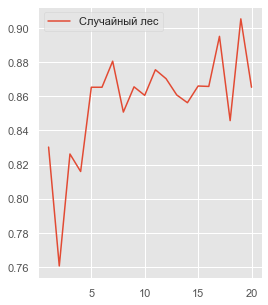

In [104]:
rfc_s=[]
rfc_=[]

for i in range(20):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s=cross_val_score(rfc,X_train,y_train,cv=10).mean()
    rfc_.append(rfc_s)

print(max(rfc_),rfc_,rfc_.index(max(rfc_)))

plt.figure(figsize=[4,5])
plt.plot(range(1,21),rfc_,label="Случайный лес")
plt.legend()
plt.show()

# Логистическая регрессия

In [76]:
# Генерируем значения параметра регуляризации С
C = np.logspace(-1, 0.1, 50)

# Для оценки используем RMSE
searcher = GridSearchCV(LogisticRegression(), [{"C": C}], scoring="neg_root_mean_squared_error", cv=4) 
searcher.fit(X_train, y_train)

# Выводим лучшее значение параметра
best_C_lr = searcher.best_params_["C"]
print("Best C = %.4f" % best_C_lr)


pipeline = Pipeline(steps=[
    # ('ohe_and_scaling', column_transformer),
    ('regression', LogisticRegression(C = best_C_lr))
])

lr = pipeline.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Best C = 0.1053


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
predictions = [int(value) for value in lr_y_pred]
for i in range(len(predictions)):
    print(predictions[i],y_test[i],sep=' ')
accuracy_lr = accuracy_score(y_test, predictions)

0 [0.]
0 [0.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
0 [0.]
0 [0.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]
1 [1.]
1 [1.]
1 [1.]
0 [0.]
1 [1.]


In [154]:
print("Accuracy LR: %.2f%%" % (accuracy_lr * 100.0))

Accuracy LR: 95.65%


In [155]:
print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

[[ 9  1]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.93      1.00      0.96        13

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.96        23
weighted avg       0.96      0.96      0.96        23



In [156]:
print("Log Loss = %.4f" % log_loss(y_test, lr.predict_proba(X_test)))

Log Loss = 0.1124


In [157]:
all_accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=4)

C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [158]:
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.94117647 0.96       0.9        0.98      ]
0.9452941176470588
0.02953503578972514


# Метод опорных векторов

In [106]:
# Параметры модели
C = np.logspace(-1, 0.1, 50)

# Для оценки используем RMSE
searcher = GridSearchCV(SVC(kernel='rbf', gamma=0.5, probability=True), [{"C": C}], scoring="neg_root_mean_squared_error", cv=7) 
searcher.fit(X_train, y_train)

# Выводим лучшее значение параметра
best_C_svm = searcher.best_params_["C"]
print("Best C = %.4f" % best_C_svm)


svm = SVC(kernel='rbf', gamma=0.5, probability=True, C = best_C_svm)
svm.fit(X_train, y_train)

C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Best C = 0.1000


C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=0.5, probability=True)

In [107]:
svm_y_pred = svm.predict(X_test)
predictions = [int(value) for value in svm_y_pred]
for i in range(len(predictions)):
    print(predictions[i],y_test[i],sep=' ')
accuracy_svm = accuracy_score(y_test, predictions)

1 [0.]
1 [0.]
1 [1.]
1 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
1 [0.]
1 [0.]
1 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
1 [1.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]


In [108]:
print("Accuracy SVM: %.2f%%" % (accuracy_svm * 100.0))

Accuracy SVM: 56.52%


In [162]:
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[ 0 10]
 [ 0 13]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23



C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anyak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

# Дерево решений

In [52]:
# Параметры модели

from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

tree_y_pred = classifier.predict(X_test)
predictions = [int(value) for value in tree_y_pred]
for i in range(len(predictions)):
    print(predictions[i],y_test[i],sep=' ')
accuracy_tree = accuracy_score(y_test, predictions)

0 [0.]
1 [0.]
1 [1.]
0 [0.]
0 [1.]
1 [1.]
1 [0.]
1 [1.]
0 [0.]
0 [0.]
0 [0.]
1 [1.]
1 [1.]
1 [0.]
1 [1.]
0 [1.]
0 [0.]
0 [1.]
1 [1.]
0 [1.]
1 [1.]
0 [0.]
0 [1.]


In [58]:
classifier.get_depth()

7

In [57]:
classifier.get_n_leaves()

25

In [60]:
classifier.feature_importances_

array([0.37074755, 0.06769793, 0.01745883, 0.        , 0.01855962,
       0.        , 0.01396706, 0.0521437 , 0.        , 0.        ,
       0.03142589, 0.        , 0.02894286, 0.        , 0.00184858,
       0.01828779, 0.        , 0.03196013, 0.13531747, 0.        ,
       0.04561516, 0.08338103, 0.04085366, 0.0104753 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03131745, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

[Text(0.5, 0.875, 'X[0] <= 4.5\ngini = 0.475\nsamples = 201\nvalue = [78, 123]'),
 Text(0.25, 0.625, 'X[18] <= 4.5\ngini = 0.408\nsamples = 91\nvalue = [65, 26]'),
 Text(0.125, 0.375, 'X[7] <= 7.0\ngini = 0.198\nsamples = 63\nvalue = [56, 7]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[21] <= 2.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[1] <= 3.5\ngini = 0.208\nsamples = 110\nvalue = [13, 97]'),
 Text(0.625, 0.375, 'X[4] <= 1.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[21] <= 1.5\ngini = 0.131\nsamples = 99\nvalue = [7, 92]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

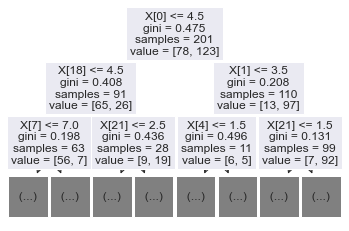

In [44]:
tree.plot_tree(classifier, max_depth = 2 ,fontsize= 12)

In [36]:
print("Accuracy Decision Tree: %.2f%%" % (accuracy_tree * 100.0))

Accuracy Decision Tree: 69.57%


In [166]:
print(confusion_matrix(y_test, tree_y_pred))
print(classification_report(y_test, tree_y_pred))

[[9 1]
 [6 7]]
              precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        10
         1.0       0.88      0.54      0.67        13

    accuracy                           0.70        23
   macro avg       0.74      0.72      0.69        23
weighted avg       0.76      0.70      0.69        23



# Входные данные

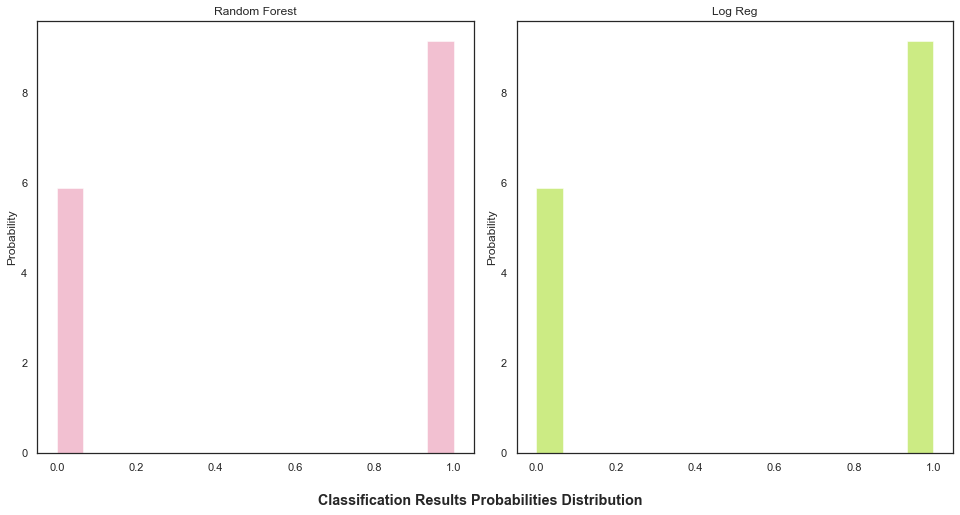

<Figure size 432x288 with 0 Axes>

In [83]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,8))

ax0.hist(calibrated_pred_rf, bins=15, alpha=0.5, color = '#e683a4', density=True)
ax0.set_ylabel('Probability')
ax0.set_title('Random Forest')

ax1.hist(lr_y_pred, bins=15, alpha=0.5, color = '#9ad80b', density=True)
ax1.set_ylabel('Probability')
ax1.set_title('Log Reg')

f.suptitle("Classification Results Probabilities Distribution", y=0.035, fontweight ='bold')
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

fig = plt.figure()

In [84]:
# Cоберем массив из ответов
test = np.array([[8.0, 9.0, 7.0, 6.0, 4.0, 4.0, 8.0, 10.0, 6.0, 5.0, 3.0, 6.0, 6.0, 2.0, 6.0, 5.0, 9.0, 8.0, 6.0, 7.0, 4.0, 6.0, 7.0, 4.0, 3.0, 7.0, 8.0, 2.0, 8.0, 6.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
test.reshape(1,-1)

array([[ 8.,  9.,  7.,  6.,  4.,  4.,  8., 10.,  6.,  5.,  3.,  6.,  6.,
         2.,  6.,  5.,  9.,  8.,  6.,  7.,  4.,  6.,  7.,  4.,  3.,  7.,
         8.,  2.,  8.,  6.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [87]:
# Предсказание
test_prediction = calibrated_rf.predict(test)
print(test_prediction)

[1.]


In [88]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(calibrated_rf, filename)

['finalized_model.sav']